전력 사용량 예측 AI 경진대회
--

전력 | 한국에너지공단 | 시계열 | SMAPE


train.csv :
train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
1시간 단위로 제공
전력사용량(kWh) 포함
train.shape: (122400, 10)


test.csv :
test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
전력사용량(kWh) 미포함
test.shape: (10080, 9)




sample_submission.csv :
sample_submission 데이터
sample_submission.shape: (10080, 2)


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# home
train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

#sd academy
#train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
#test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
#sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

In [2]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)
df_sample_submission=pd.DataFrame(sample_submission)

In [3]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [4]:
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


시간칼럼 분류
--

In [6]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [7]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
 10  time        122400 non-null  int32         
 11  month_day   122400 non-null  int32         
 12  month       122400 non-null  int32         
 13  date        122400 non-null  int32         
 14  hour        122400 non-null  int32         
 15  day         122400 non-null  object        
dtypes:

description

- num: 건물번호
- date_time: 시간
- 전력사용량(kWh)
- 전력사용량(kWh)  
- 기온(°C)     
- 풍속(m/s)    
- 습도(%)       
- 강수량(mm)  
- 일조(hr)    
- 비전기냉방설비운영   
- 태양광보유      

In [9]:
df_train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,70789.147059,707.776471,6.929412,14.835294,11.500000
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,7871.284093,78.712810,0.793925,8.446192,6.922215
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,60100.000000,601.000000,6.000000,1.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,62205.750000,622.000000,6.000000,8.000000,5.750000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,71311.500000,713.000000,7.000000,15.000000,11.500000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,80317.250000,803.000000,8.000000,22.000000,17.250000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,82423.000000,824.000000,8.000000,31.000000,23.000000


In [10]:
df_train.isna().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
time          0
month_day     0
month         0
date          0
hour          0
day           0
dtype: int64

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        3360 non-null   float64       
 3   풍속(m/s)       3360 non-null   float64       
 4   습도(%)         3360 non-null   float64       
 5   강수량(mm, 6시간)  1680 non-null   float64       
 6   일조(hr, 3시간)   3360 non-null   float64       
 7   비전기냉방설비운영     2296 non-null   float64       
 8   태양광보유         1624 non-null   float64       
 9   time          10080 non-null  int32         
 10  month_day     10080 non-null  int32         
 11  month         10080 non-null  int32         
 12  date          10080 non-null  int32         
 13  hour          10080 non-null  int32         
 14  day           10080 non-null  object        
dtypes: datetime64[ns](1), float64(7), in

In [12]:
df_test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0,10080.000000,10080.000000,10080.0,10080.000000,10080.00000
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0,200.129683,2.000099,0.0,2.000099,6.92253
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0,82500.000000,825.000000,8.0,25.000000,0.00000
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0,82617.750000,826.000000,8.0,26.000000,5.75000
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0,83005.250000,830.000000,8.0,30.000000,17.25000
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0,83123.000000,831.000000,8.0,31.000000,23.00000


In [13]:
df_test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
time               0
month_day          0
month              0
date               0
hour               0
day                0
dtype: int64

In [14]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_date_time  10080 non-null  object
 1   answer         10080 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.6+ KB


In [16]:
df_sample_submission.iloc[0]

num_date_time    1 2020-08-25 00
answer                         0
Name: 0, dtype: object

In [17]:
i=0
company_num=[]

for i in range(0,10080):
    company=df_sample_submission.iloc[i].str.split('2020').str[0].values[0]
    company_num.append(company)
    i+=1

In [18]:
company_num=pd.Series(company_num)

In [19]:
df_sample_submission['num']=company_num
df_sample_submission

,num_date_time,answer,num
0,1 2020-08-25 00,0,1
1,1 2020-08-25 01,0,1
2,1 2020-08-25 02,0,1
3,1 2020-08-25 03,0,1
4,1 2020-08-25 04,0,1
...,...,...,...
10075,60 2020-08-31 19,0,60
10076,60 2020-08-31 20,0,60
10077,60 2020-08-31 21,0,60
10078,60 2020-08-31 22,0,60


In [20]:
i=0
time_d=[]

for i in range(0,10080):
    t1=len(df_sample_submission.iloc[i].str.split('2020').str[0].values[0])
    t2=df_sample_submission.iloc[i, 0][t1:]
    time_d.append(t2)
    i+=1

In [21]:
time_d=pd.Series(time_d)
df_sample_submission['time']=time_d
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


In [22]:
df_sample_submission.num.unique()

array(['1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', '11 ',
       '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ',
       '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ',
       '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ',
       '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ',
       '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ',
       '57 ', '58 ', '59 ', '60 '], dtype=object)

In [23]:
df_sample_submission.time.unique()

array(['2020-08-25 00', '2020-08-25 01', '2020-08-25 02', '2020-08-25 03',
       '2020-08-25 04', '2020-08-25 05', '2020-08-25 06', '2020-08-25 07',
       '2020-08-25 08', '2020-08-25 09', '2020-08-25 10', '2020-08-25 11',
       '2020-08-25 12', '2020-08-25 13', '2020-08-25 14', '2020-08-25 15',
       '2020-08-25 16', '2020-08-25 17', '2020-08-25 18', '2020-08-25 19',
       '2020-08-25 20', '2020-08-25 21', '2020-08-25 22', '2020-08-25 23',
       '2020-08-26 00', '2020-08-26 01', '2020-08-26 02', '2020-08-26 03',
       '2020-08-26 04', '2020-08-26 05', '2020-08-26 06', '2020-08-26 07',
       '2020-08-26 08', '2020-08-26 09', '2020-08-26 10', '2020-08-26 11',
       '2020-08-26 12', '2020-08-26 13', '2020-08-26 14', '2020-08-26 15',
       '2020-08-26 16', '2020-08-26 17', '2020-08-26 18', '2020-08-26 19',
       '2020-08-26 20', '2020-08-26 21', '2020-08-26 22', '2020-08-26 23',
       '2020-08-27 00', '2020-08-27 01', '2020-08-27 02', '2020-08-27 03',
       '2020-08-27 04', '

EDA 1: Train 데이터
--

전력사용량 기준  EDA
--

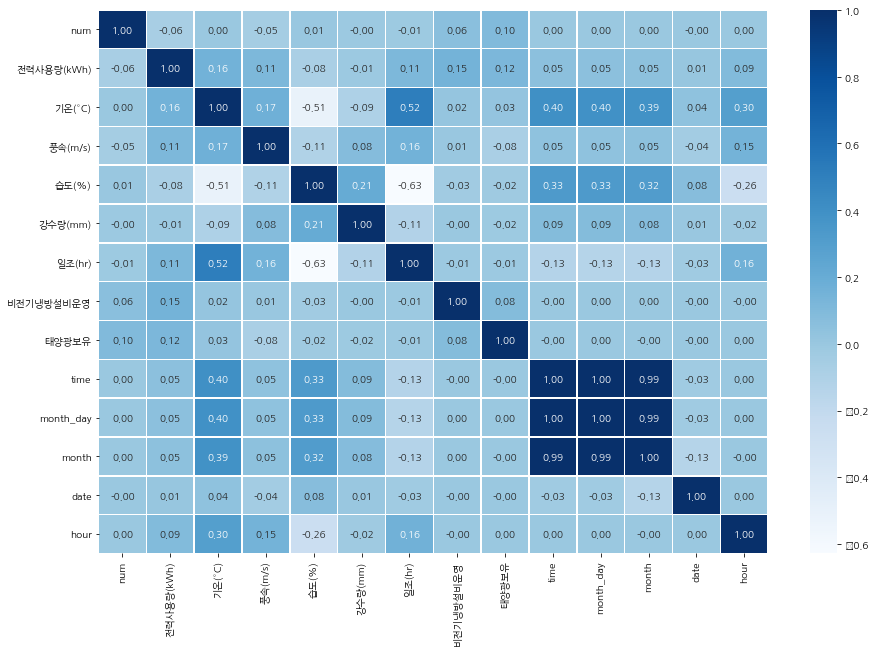

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [25]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

시간과 전력사용량 관계
--

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'month')]

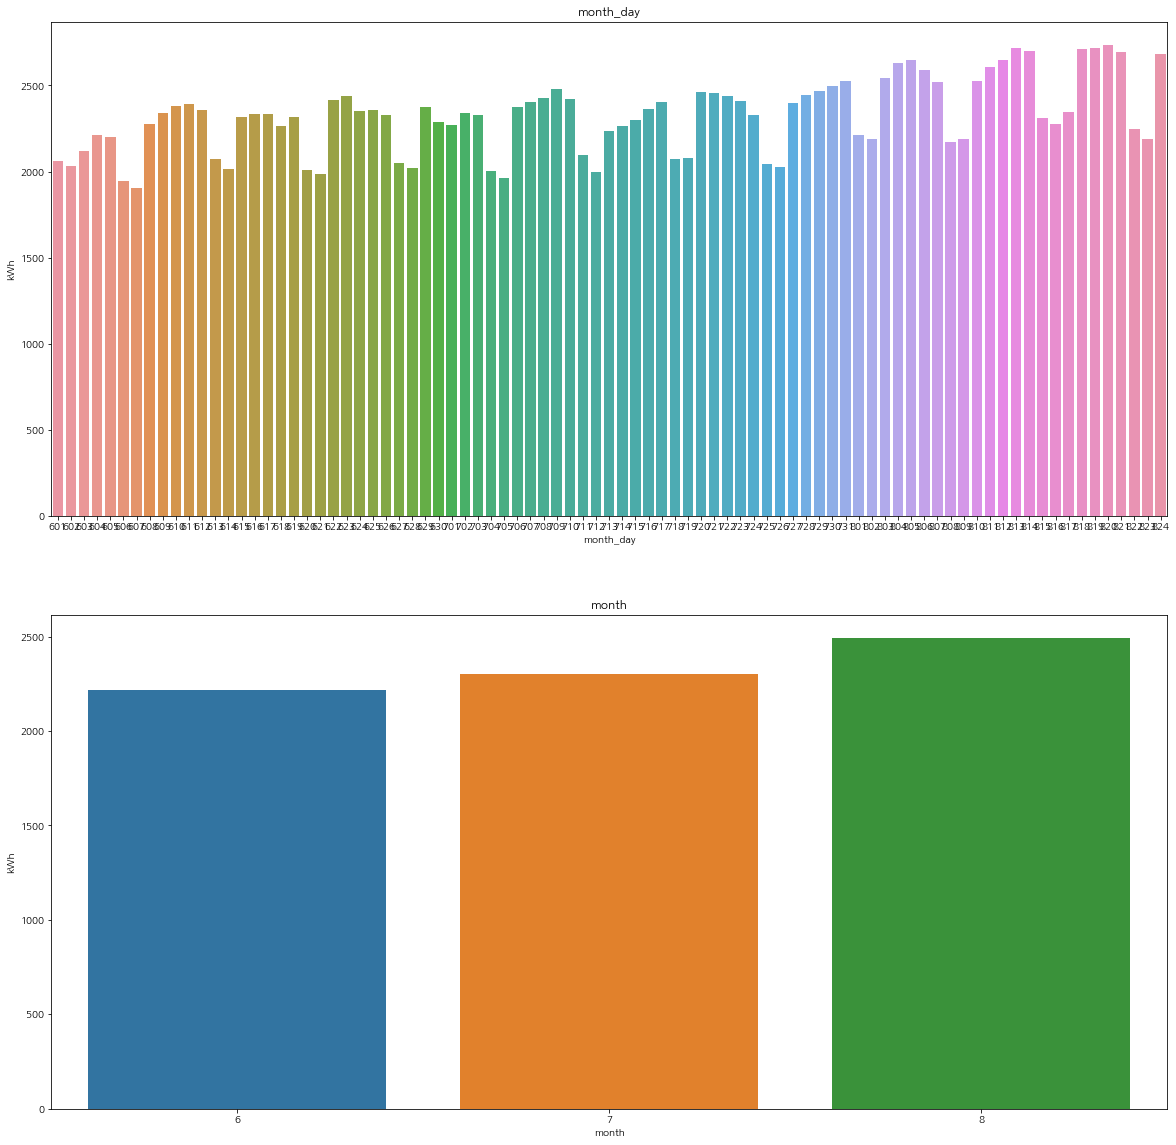

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

md=df_train.groupby('month_day')['전력사용량(kWh)'].mean().reset_index()
m=df_train.groupby('month')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=md, x="month_day", y='전력사용량(kWh)', ax=ax1)

sns.barplot(data=m, x="month", y='전력사용량(kWh)', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="month_day")
ax2.set(ylabel='kWh', title ="month")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

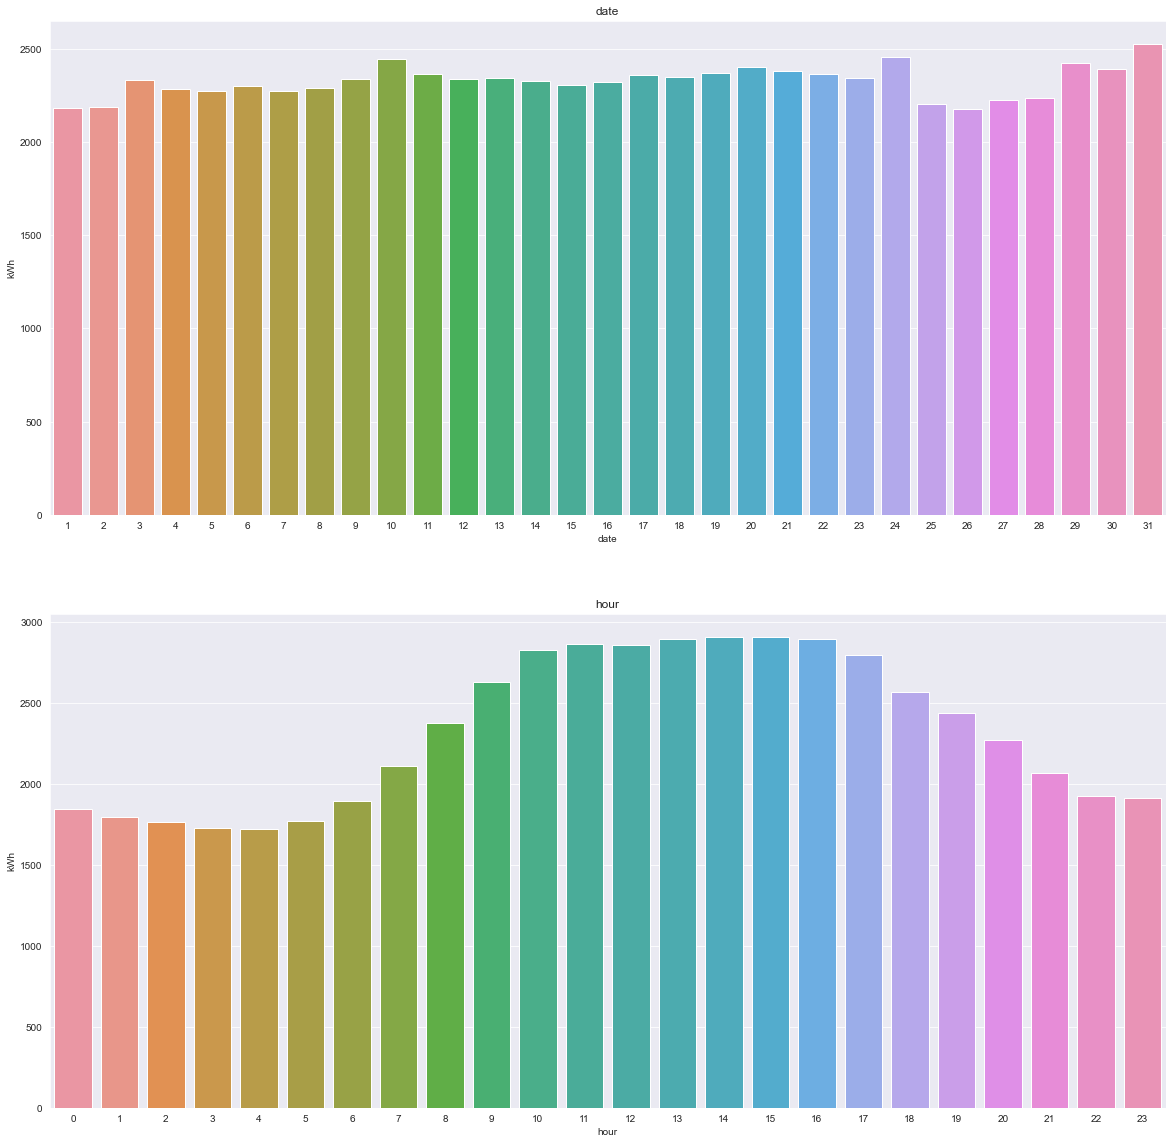

In [27]:
import seaborn as sns

figure, ( (ax3), (ax4)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

date=df_train.groupby('date')['전력사용량(kWh)'].mean().reset_index()
h=df_train.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=date, x="date", y='전력사용량(kWh)', ax=ax3)

sns.barplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax4)

ax3.set(ylabel='kWh', title ="date")
ax4.set(ylabel='kWh', title ="hour")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'day')]

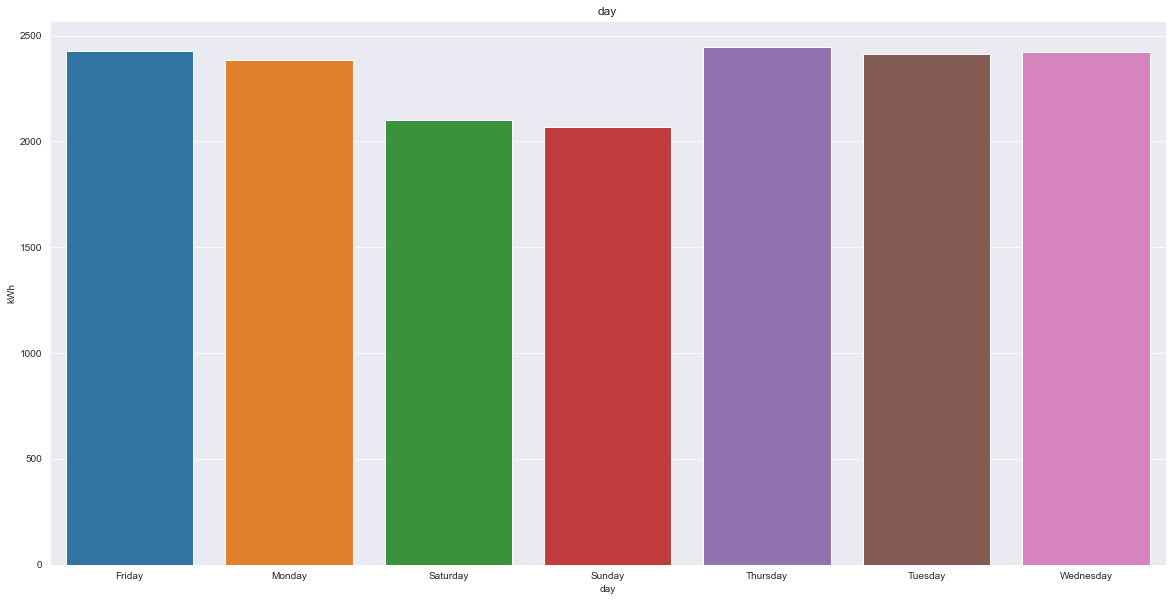

In [28]:
import seaborn as sns

figure, (ax5) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

day=df_train.groupby('day')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=day, x="day", y='전력사용량(kWh)', ax=ax5)

sns.set_style("darkgrid")
ax5.set(ylabel='kWh', title ="day")

<AxesSubplot:xlabel='month_day', ylabel='전력사용량(kWh)'>

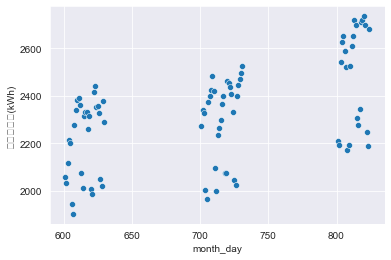

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(md.month_day, md['전력사용량(kWh)'])

기온과 전력사용량 관계
--

In [30]:
tem=df_train.groupby(['기온(°C)'])['전력사용량(kWh)' ].mean().reset_index()
tem

,기온(°C),전력사용량(kWh)
0,11.1,672.624
1,11.2,848.880
2,11.3,721.224
3,11.7,482.220
4,11.8,473.364
...,...,...
240,35.6,1767.312
241,35.7,1554.282
242,35.8,1748.304
243,36.0,1505.088


<AxesSubplot:xlabel='기온(°C)', ylabel='전력사용량(kWh)'>

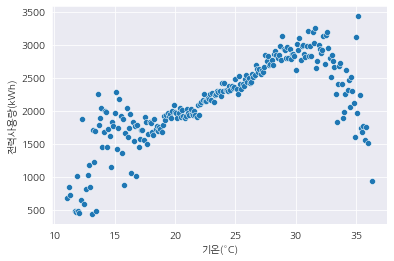

In [31]:
plt.rcParams['font.family'] = 'NanumGothic'

sns.scatterplot(tem['기온(°C)'],tem['전력사용량(kWh)'])

비전기냉방설비운영과 전력사용량 관계
--

In [32]:
Non_electric_cooling_equipment=df_train.groupby(['비전기냉방설비운영'])['전력사용량(kWh)' ].mean().reset_index()
Non_electric_cooling_equipment

,비전기냉방설비운영,전력사용량(kWh)
0,0.0,1868.722163
1,1.0,2536.198313


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and Non_electric_cooling_equipment')]

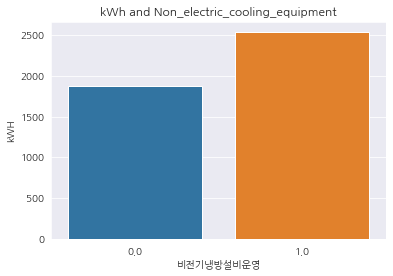

In [33]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)

plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=Non_electric_cooling_equipment, x='비전기냉방설비운영', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and Non_electric_cooling_equipment')

태양광보유와 전력사용량 관계
--

In [34]:
sunlight=df_train.groupby(['태양광보유'])['전력사용량(kWh)' ].mean().reset_index()
sunlight

,태양광보유,전력사용량(kWh)
0,0.0,2093.135722
1,1.0,2572.504986


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and sunlight')]

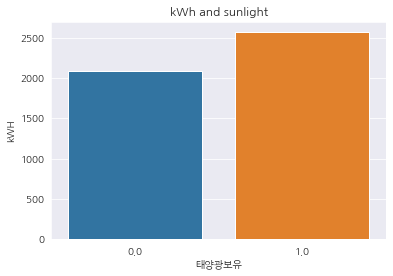

In [35]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=sunlight, x='태양광보유', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and sunlight')

나머지 변수들의 상관관계
--

건물번호와 전력사용량 관계
--

In [36]:
building_num=df_train.groupby(['num'])['전력사용량(kWh)'].sum().reset_index()

[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'num and kWh')]

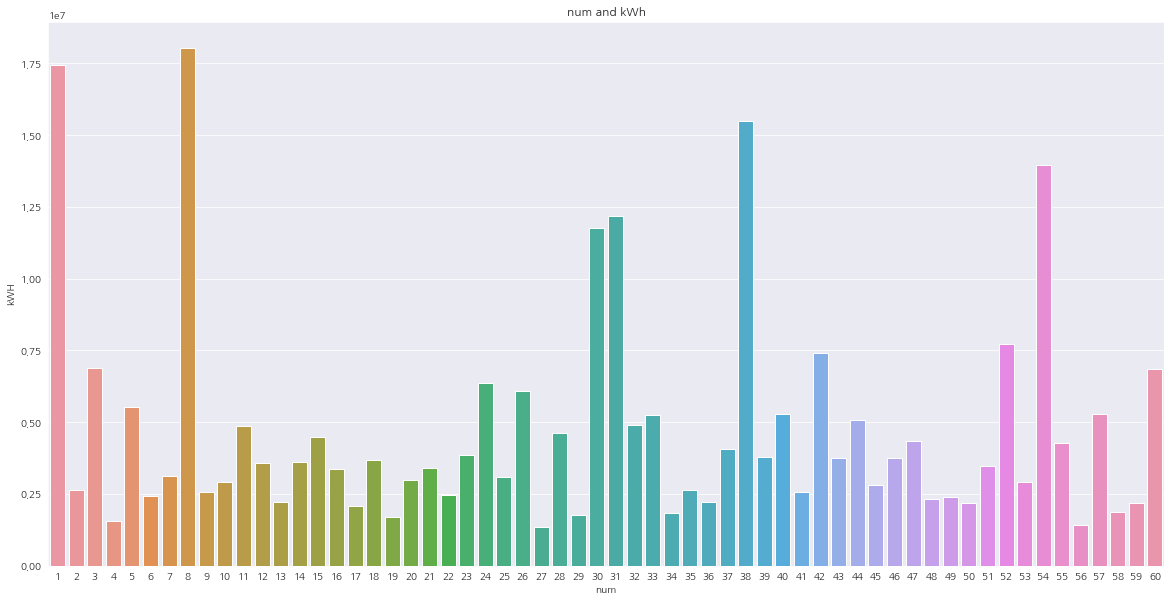

In [37]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=building_num, x='num', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='num and kWh')

날짜와 시간 기준
--

In [38]:
tn1=df_train.groupby(['time'])['풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)','전력사용량(kWh)'].mean().reset_index()

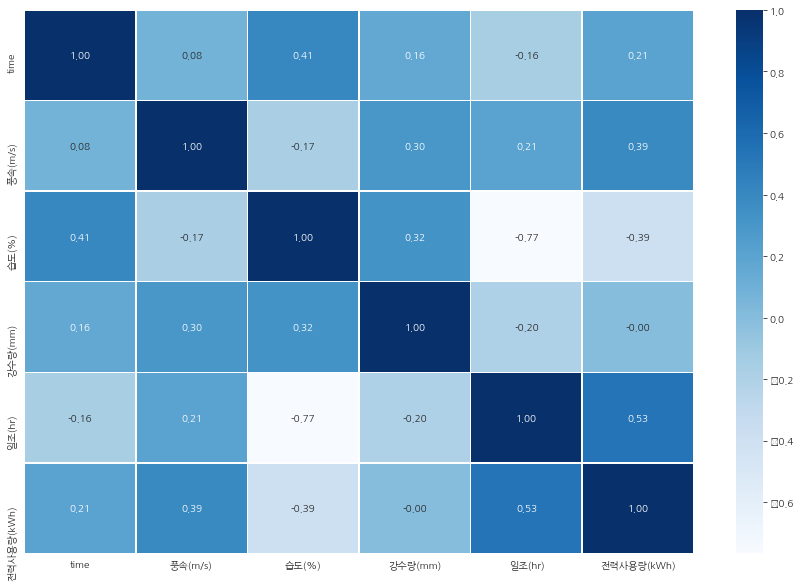

In [39]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=tn1.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

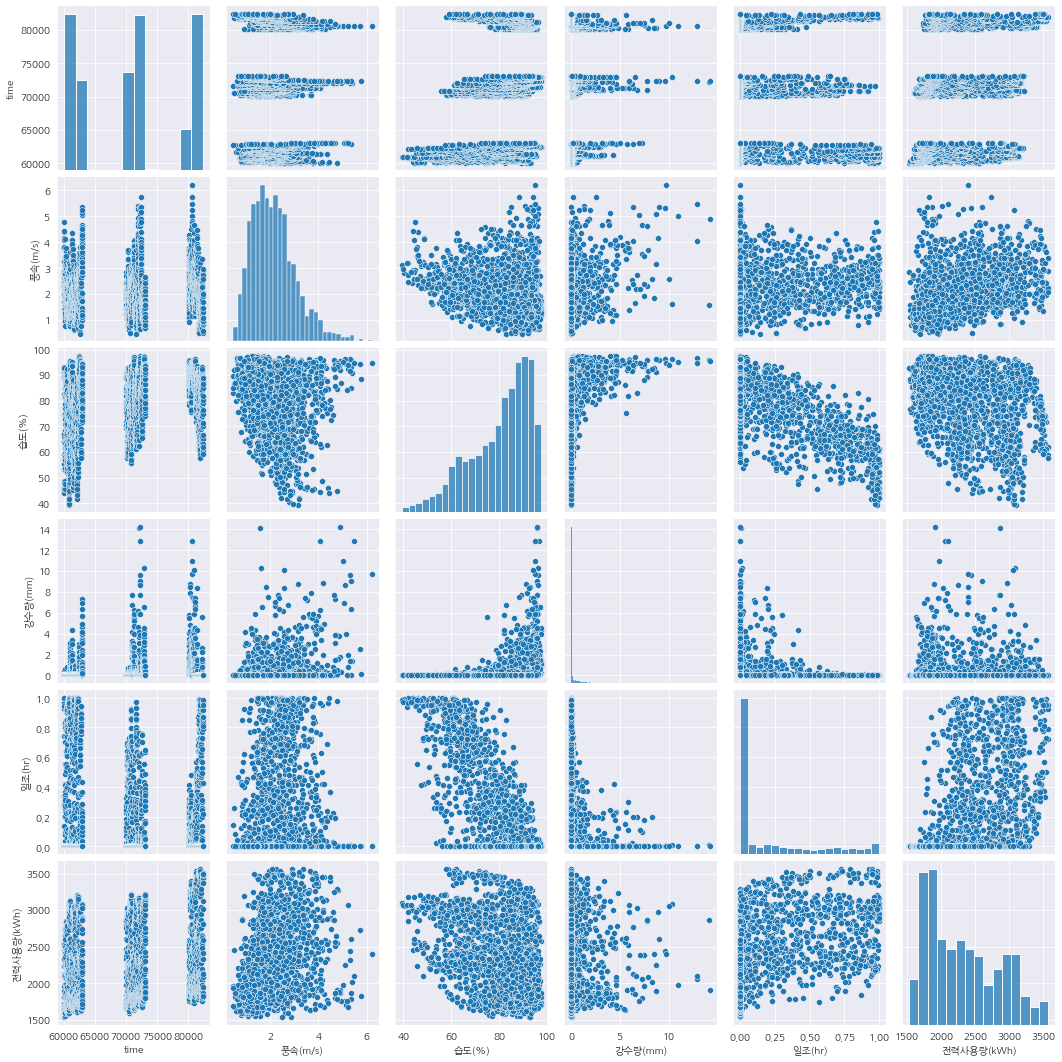

In [40]:
sns.pairplot(tn1)
plt.rcParams['font.family'] = 'NanumGothic'

회사별로 비교해보기
--

In [41]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [42]:
num_info=df_train.groupby(['num'])['기온(°C)','전력사용량(kWh)','풍속(m/s)','습도(%)','강수량(mm)',  '비전기냉방설비운영', '태양광보유'].mean().reset_index()
num_info.head()

,num,기온(°C),전력사용량(kWh),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유
0,1,24.608578,8543.273488,2.345980,75.971569,0.493873,0.0,0.0
1,2,23.623333,1299.914365,3.197990,81.113725,0.720098,1.0,0.0
2,3,24.241275,3371.353699,1.937402,82.667157,0.540882,1.0,1.0
3,4,25.143627,763.997353,2.056324,71.136275,0.393186,1.0,1.0
4,5,23.623333,2714.509694,3.197990,81.113725,0.720098,1.0,0.0


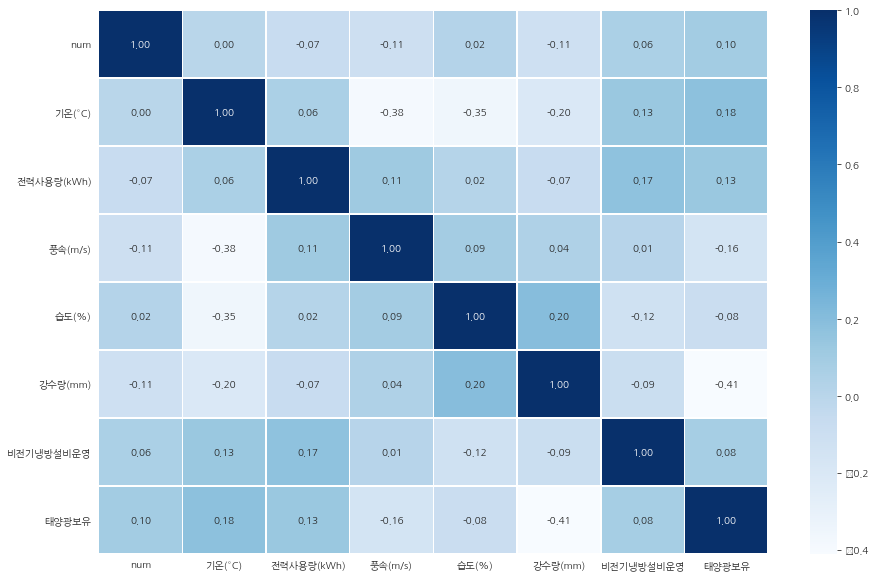

In [43]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=num_info.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

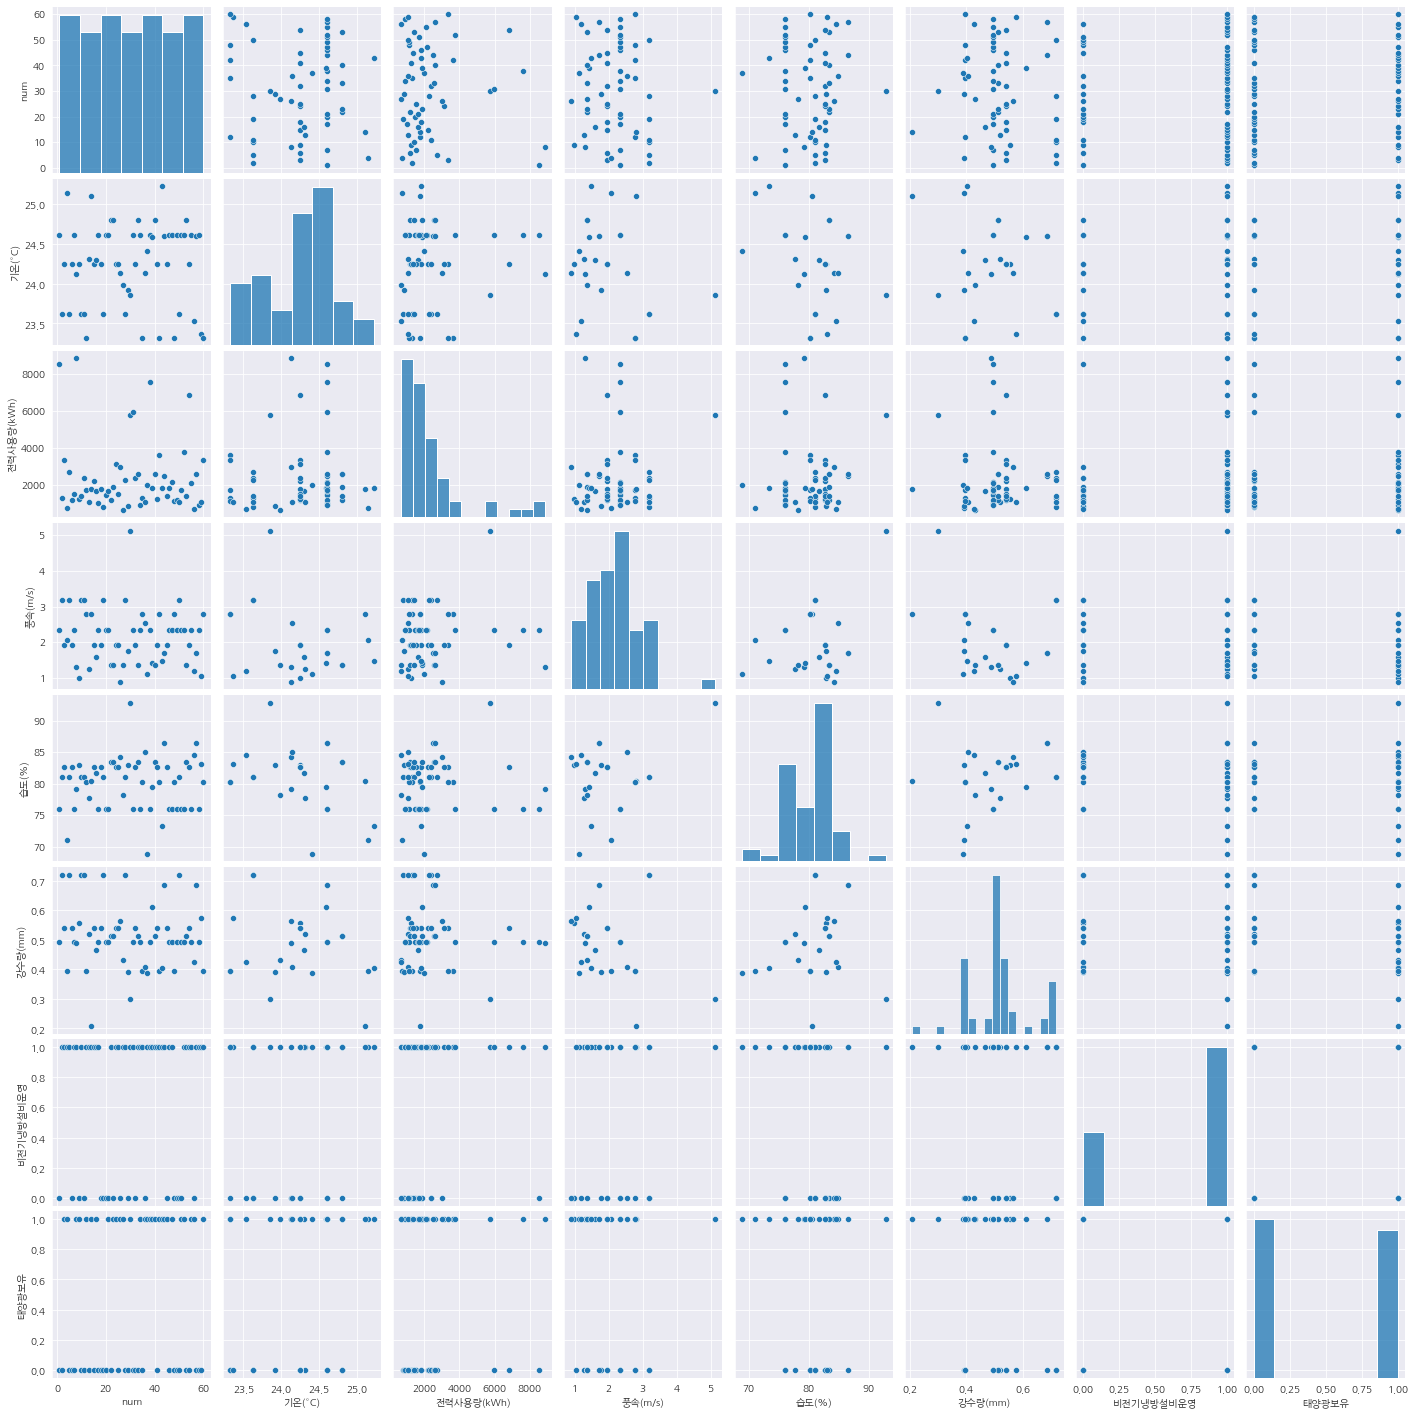

In [44]:
sns.pairplot(num_info)
plt.rcParams['font.family'] = 'NanumGothic'

Linear Regression
--

- train 데이터를 기준으로 마지막 7일 이전을 train, 마지막 7일을 test로 설정해준 뒤
- train 데이터와 test 데이터로 회귀분석을 진행합니다.

day label encoding

In [45]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_day=le.fit_transform(df_train['day'])
np_day=df_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_train['day']=day

In [46]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_day=le.fit_transform(df_test['day'])
np_day=df_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_test['day']=day

In [47]:
X=df_train.drop(['date_time', '전력사용량(kWh)'], axis=1)
y=df_train['전력사용량(kWh)']

train_1=df_train.loc[df_train['time']<=81723]
test_1=df_train.loc[df_train['time']>81723]
train_2=train_1.drop(['date_time'], axis=1)
test_2=test_1.drop(['date_time'],  axis=1)

train=train_2.drop(['전력사용량(kWh)'], axis=1)
test=test_2.drop(['전력사용량(kWh)'],  axis=1)
y_train=train_2['전력사용량(kWh)']
y_test=test_2['전력사용량(kWh)']

In [48]:
X_train=train
X_test=test

In [49]:
X_train

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,60100,601,6,1,0,1
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,60101,601,6,1,1,1
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,60102,601,6,1,2,1
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,60103,601,6,1,3,1
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,60104,601,6,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122227,60,28.0,1.2,81.0,0.0,0.9,1.0,1.0,81719,817,8,17,19,1
122228,60,26.8,2.1,86.0,0.0,0.0,1.0,1.0,81720,817,8,17,20,1
122229,60,26.0,2.1,92.0,0.0,0.0,1.0,1.0,81721,817,8,17,21,1
122230,60,25.8,1.0,87.0,0.0,0.0,1.0,1.0,81722,817,8,17,22,1


In [50]:
X_test

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
1872,1,26.2,0.9,84.0,0.0,0.0,0.0,0.0,81800,818,8,18,0,5
1873,1,25.7,0.9,86.0,0.0,0.0,0.0,0.0,81801,818,8,18,1,5
1874,1,25.4,0.6,88.0,0.0,0.0,0.0,0.0,81802,818,8,18,2,5
1875,1,25.0,0.4,89.0,0.0,0.0,0.0,0.0,81803,818,8,18,3,5
1876,1,24.8,0.6,90.0,0.0,0.0,0.0,0.0,81804,818,8,18,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,1.0,1.0,82419,824,8,24,19,1
122396,60,27.3,1.2,71.0,0.0,0.0,1.0,1.0,82420,824,8,24,20,1
122397,60,27.3,1.8,71.0,0.0,0.0,1.0,1.0,82421,824,8,24,21,1
122398,60,27.1,1.8,74.0,0.0,0.0,1.0,1.0,82422,824,8,24,22,1


In [51]:
y_train

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122227    4261.248
122228    4202.064
122229    4036.608
122230    3850.416
122231    3297.888
Name: 전력사용량(kWh), Length: 112320, dtype: float64

In [52]:
y_test

1872      8690.976
1873      8672.184
1874      8645.616
1875      8583.408
1876      8562.672
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: 전력사용량(kWh), Length: 10080, dtype: float64

모델 적용해보기

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [54]:
import numpy as np

y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 1962.5857866847173 입니다.
r2 는 0.07 입니다.
train 스코어는 0.07405798886950676 입니다.


In [55]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 2153.4419250532155 입니다.
r2 점수는 0.08 입니다.
test 스코어는 0.0839636988481508 입니다.


In [56]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             전력사용량(kWh)   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     842.7
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        20:45:19   Log-Likelihood:            -1.1027e+06
No. Observations:              122400   AIC:                         2.205e+06
Df Residuals:                  122387   BIC:                         2.206e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -918.2959     73.890    -12.428      0.000   -1063.119    -773.473
num           -9.3569      0.329    -28.433      0.000     -10.002      -8.712
기온(°C)        75.4972      2.936     25.718      0.000      69.743      81.251
풍속(m/s)      115.1868      3.874     29.735      0.000     107.594     122.779
습도(%)          7.5567      0.620     12.182      0.000       6.341       8.773
강수량(mm)       -2.0487      2.218     -0.924      0.356      -6.397       2.299
일조(hr)       349.9067     20.899     16.743      0.000     308.945     390.869
비전기냉방설비운영    641.4528     12.236     52.425      0.000     617.471     665.435
태양광보유        481.1327     11.455     42.003      0.000     458.681     503.584
time          -0.0009      0.001     -0.837      0.403      -0.003       0.001
month_day     -0.1355      0.009    -15.503      0.000      -0.153      -0.118
month         -0.0233      0.007     -3.395      0.001      -0.037      -0.010
date           2.1967      0.687      3.198      0.001       0.850       3.543
hour          13.5496      0.874     15.499      0.000      11.836      15.263
day           24.2586      2.838      8.547      0.000      18.696      29.821
==============================================================================
Omnibus:                    66710.759   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529088.674
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      11.811   Cond. No.                     1.14e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

비전기냉방설비운영    638.8
태양광보유        469.6
일조(hr)       291.4
풍속(m/s)      113.1
기온(°C)        76.2
day           25.2
hour          13.5
습도(%)          7.0
date           1.6
month         -0.0
time          -0.0
month_day     -0.1
강수량(mm)       -2.0
num           -9.4
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

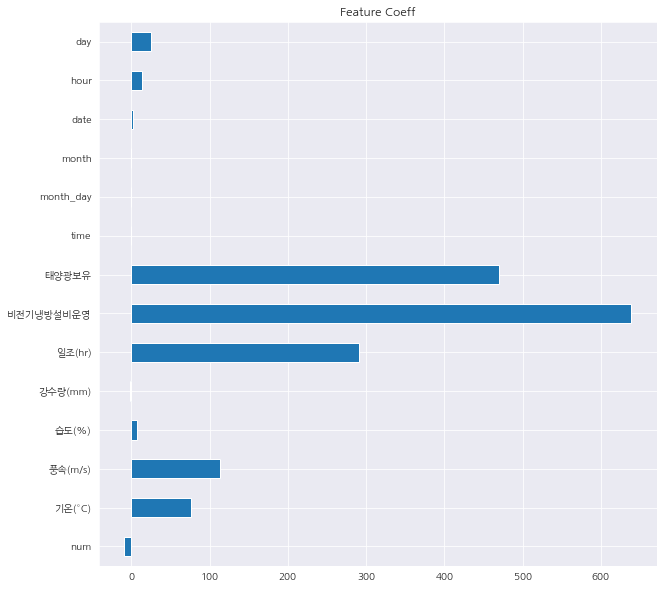

In [58]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

EDA 2: Train데이터와 Test 데이터
--

날짜 정보와 날씨 기준 EDA 이후 칼럼 만들기
--

날짜 정보: 'time', 'month_day', 'month', 'date', 'hour', 'day'

날씨 정보:  '기온(°C)',  '풍속(m/s)',  '습도(%)',  '강수량(mm)', '일조(hr)'

In [59]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,60100,601,6,1,0,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,60101,601,6,1,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,60102,601,6,1,2,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,60103,601,6,1,3,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,60104,601,6,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,82419,824,8,24,19,1
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,82420,824,8,24,20,1
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,82421,824,8,24,21,1
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,82422,824,8,24,22,1


In [60]:
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN,82500,825,8,25,0,5
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82501,825,8,25,1,5
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82502,825,8,25,2,5
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN,82503,825,8,25,3,5
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82504,825,8,25,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83119,831,8,31,19,1
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83120,831,8,31,20,1
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0,83121,831,8,31,21,1
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83122,831,8,31,22,1


In [61]:
df_test=df_test.fillna(0)
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour,day
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,82500,825,8,25,0,5
1,1,2020-08-25 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82501,825,8,25,1,5
2,1,2020-08-25 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82502,825,8,25,2,5
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,0.0,0.0,0.0,0.0,82503,825,8,25,3,5
4,1,2020-08-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82504,825,8,25,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83119,831,8,31,19,1
10076,60,2020-08-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83120,831,8,31,20,1
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,0.0,0.0,1.0,1.0,83121,831,8,31,21,1
10078,60,2020-08-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83122,831,8,31,22,1


회사별로 날짜 별 기온 확인해보기
--

In [62]:
tem_table=pd.pivot_table(df_train, index='num'  , columns='month_day'  , values= '기온(°C)')
tem_table=tem_table.fillna(0)
tem_table.describe()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,...,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,1.532636,1.561297,0.892132,1.832348,1.734588,1.437018,1.278749,1.143025,1.242311,0.949437,...,1.570301,0.885985,0.637076,0.932316,1.075958,0.923821,0.783692,1.016421,1.015121,0.671312
min,17.600000,16.720833,19.816667,18.991667,19.945833,19.870833,19.845833,21.058333,23.204167,22.666667,...,25.241667,26.208333,26.462500,26.179167,26.029167,26.525000,25.487500,24.400000,24.200000,26.033333
25%,19.091667,17.841667,21.291667,21.908333,21.562500,21.870833,21.387500,23.225000,24.651042,24.625000,...,26.100000,27.383333,28.183333,26.945833,26.645833,27.400000,26.608333,24.893750,25.020833,27.441667
50%,19.841667,17.900000,21.716667,22.316667,22.862500,23.150000,22.852083,24.200000,25.606250,25.466667,...,26.708333,27.575000,28.258333,27.541667,27.145833,27.554167,26.954167,25.462500,25.570833,27.529167
75%,21.432292,19.907292,21.841667,24.493750,24.104167,24.583333,22.879167,24.775000,26.604167,26.066667,...,28.767708,28.389583,28.416667,28.591667,28.837500,28.944792,27.437500,26.751042,26.958333,27.920833
max,23.962500,22.416667,24.137500,27.433333,26.416667,25.395833,24.508333,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,29.133333,27.758333,28.120833,29.908333


In [63]:
tem_table.head()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
num,,,,,,,,,,,,,,,,,,,,,
1,19.841667,17.900000,21.841667,21.908333,22.862500,24.583333,22.870833,24.775000,26.604167,26.066667,...,26.100000,27.383333,28.258333,27.541667,27.145833,27.554167,26.608333,24.400000,25.020833,27.529167
2,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833
3,19.091667,17.841667,21.716667,22.316667,21.562500,23.150000,21.666667,23.854167,25.445833,25.466667,...,26.708333,27.575000,28.183333,26.945833,26.645833,27.400000,27.437500,25.462500,25.570833,27.441667
4,23.962500,22.416667,24.137500,27.433333,26.416667,21.233333,23.341667,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,27.245833,26.879167,28.120833,28.562500
5,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833


각 회사마다 지역에 따라 해당 날짜 온도 차이가 있음을 확인. 향후 지역별로 군집화 할 때 좋은 자료가 될 수도 있을 것이라고 추정

시간대별로 일조량 확인해보기
--

- 일출과 일몰 시간 확인

In [64]:
sun_table=pd.pivot_table(df_train, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table=sun_table.fillna(0)
sun_table.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,85.0,85.0,85.0,85.0,85.0,85.0,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.015007,0.186096,0.273396,0.296448,...,0.338589,0.346387,0.342443,0.350433,0.354469,0.303675,0.084529,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333,0.068333,0.076667,...,0.186667,0.126667,0.188333,0.101667,0.046667,0.018333,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086667,0.221667,0.298333,...,0.433333,0.500000,0.443333,0.383333,0.255000,0.133333,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.001667,0.220000,0.431667,0.565000,...,0.731667,0.781667,0.781667,0.798333,0.736667,0.538333,0.026667,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.085000,0.903333,0.963333,0.996667,...,1.000000,1.000000,0.998333,1.000000,0.995000,0.945000,0.305000,0.0,0.0,0.0


In [65]:
sun_table.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
601,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138333,0.336667,0.745000,...,0.963333,0.980000,0.966667,0.995000,0.995000,0.945000,0.278333,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.231667,0.271667,0.365000,...,0.416667,0.553333,0.415000,0.255000,0.255000,0.096667,0.000000,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075000,0.270000,0.195000,...,0.815000,0.825000,0.836667,0.798333,0.785000,0.611667,0.003333,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.111667,0.221667,0.393333,...,0.918333,0.745000,0.531667,0.510000,0.556667,0.223333,0.000000,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093333,0.278333,0.400000,...,0.935000,0.933333,0.945000,0.901667,0.828333,0.180000,0.000000,0.0,0.0,0.0


지역 차이에 따른 일출, 일몰 시각 혹은 날씨에 따라 일조량의 차이가 있을 것이라고 추측

In [66]:
sun_table2=pd.pivot_table(df_train, index='num'  , columns='hour'  , values= '일조(hr)')
sun_table2=sun_table2.fillna(0)
sun_table2.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,60.0,60.0,60.0,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.009765,0.042500,0.053579,0.062138,...,0.053579,0.052377,0.053486,0.055399,0.047943,0.050776,0.032746,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065882,0.202353,0.260000,...,0.395294,0.412941,0.384706,0.368235,0.332941,0.080000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.122353,0.266176,0.297647,...,0.420882,0.419118,0.416471,0.374412,0.332941,0.249118,0.009118,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.136471,0.280588,0.334118,...,0.477059,0.487059,0.473529,0.447647,0.408235,0.287059,0.032941,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.007353,0.185882,0.304706,0.377941,...,0.497647,0.507059,0.516471,0.490294,0.431765,0.331765,0.064706,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.341176,0.455294,0.508235,...,0.571765,0.576471,0.588235,0.528235,0.477647,0.376471,0.115294,0.0,0.0,0.0


In [67]:
sun_table2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.136471,0.268235,0.297647,...,0.395294,0.412941,0.416471,0.368235,0.332941,0.287059,0.064706,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.122353,0.292941,0.334118,...,0.482353,0.503529,0.516471,0.470588,0.431765,0.331765,0.032941,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.028235,0.236471,0.371765,0.462353,...,0.483529,0.468235,0.478824,0.431765,0.396471,0.248235,0.028235,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0


In [68]:
sun_table2[6].unique()

array([0.        , 0.00117647, 0.02823529, 0.00235294, 0.00823529,
       0.01058824, 0.03294118, 0.01176471, 0.00705882, 0.01882353,
       0.05882353, 0.00588235, 0.01764706, 0.00352941, 0.00352941])

In [69]:
sun_table[20].unique()

array([0.27833333, 0.        , 0.00333333, 0.00833333, 0.02333333,
       0.03333333, 0.03666667, 0.20666667, 0.04      , 0.00166667,
       0.255     , 0.27833333, 0.285     , 0.23833333, 0.02666667,
       0.02666667, 0.26833333, 0.02      , 0.005     , 0.055     ,
       0.23      , 0.06      , 0.10166667, 0.165     , 0.305     ,
       0.24333333, 0.04666667, 0.06833333, 0.01666667, 0.05166667])

향후에 회사를 구역별로 나눌 때 도움이 될 것이라고 판단

이상기후 찾아보기
--


기상청 날씨누리 기상특보 발표기준: 

https://www.weather.go.kr/weather/warning/standard.jsp

기상청 기상자료개방포털:

https://data.kma.go.kr/climate/windChill/selectWindChillChart.do?pgmNo=111

강풍특보
--

주의보: 풍속 14m/s

경보: 풍속 21m/s

In [70]:
df_train['강풍특보']=df_train['풍속(m/s)']
df_test['강풍특보']=df_test['풍속(m/s)']

Train

In [71]:
i=0

for i in range(0,122400):
    wind=df_train.loc[i, '풍속(m/s)']
    if wind >=21:
        df_train['강풍특보'][i]=3
    elif 21>wind >=14:
        df_train['강풍특보'][i]=2
    else:
        df_train['강풍특보'][i]=1
    
    i+=1        

In [72]:
df_train['강풍특보'].unique()

array([1., 2.])

In [73]:
Typhoon_warning=df_train.loc[df_train['강풍특보']==2]

print('강풍주의보가 발령된 횟수는', len(df_train.loc[df_train['강풍특보']==2]), '번 입니다')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍주의보가 발령된 횟수는 31 번 입니다
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 시간은 [62920 62922 62923 63000 63001 63002 63003 63004 72319 72321 72322 72323
 72400 72401 72402 72403 72406 72407 72408 72409 72410 72411 72412 72413
 72414 72415 72416 72417 72418 72419 72502] 입니다.


Test

In [74]:
i=0

for i in range(0,10080):
    wind=df_test.loc[i, '풍속(m/s)']
    if wind >=21:
        df_test['강풍특보'][i]=3
    elif 21>wind >=14:
        df_test['강풍특보'][i]=2
    else:
        df_test['강풍특보'][i]=1
    
    i+=1 

In [75]:
df_test['강풍특보'].unique()

array([1., 2., 3.])

In [76]:
Typhoon_warning=df_test.loc[df_test['강풍특보']==2]

print('강풍주의보가 발령된 횟수는', len(df_test.loc[df_test['강풍특보']==2]), '번 입니다')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍주의보가 발령된 횟수는 4 번 입니다
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 시간은 [82609 82612 82618 82621] 입니다.


In [77]:
Typhoon_warning=df_test.loc[df_test['강풍특보']==3]

print('강풍 경보가 발령된 횟수는', len(df_test.loc[df_test['강풍특보']==3]), '번 입니다')
print('강풍 경보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 경보가 발령된 시간은', Typhoon_warning.time.unique(), '입니다.')

강풍 경보가 발령된 횟수는 1 번 입니다
강풍 경보가 발령된 건물번호는 [30] 입니다.
강풍 경보가 발령된 시간은 [82615] 입니다.


호우특보
--


호우 주의보:

- 3시간 누적 강우량이 60mm 이상 예상되거나,

- 12시간 누적 강우량이 110mm 이상 예상될 때,

호우 경보:

- 3시간 누적강우량이 90mm 이상 예상 되거나

- 12시간 누적강우량이 180mm  이상 예상될 때


현재 test 데이터에는 강수량(mm,6시간)으로 되어있으므로

- 6시간 누적 강우량이 76mm이상일 시, 호우 주의보

- 6시간 누적 가우량이 120mm이상일 시, 호우 특보 발령

In [78]:
df_train['호우특보']=df_train['강수량(mm)']
df_test['호우특보']=df_test['강수량(mm, 6시간)']

Train

In [79]:
i=0

for i in range(0,122398):
    a=df_train.loc[i, '강수량(mm)']
    b=df_train.loc[i+1, '강수량(mm)']
    c=df_train.loc[i+2, '강수량(mm)']

    d=a+b+c
    
    if d<60:
        df_train['호우특보'][i]=1
    elif 60<= d <90:
        df_train['호우특보'][i]=2
    else:
        df_train['호우특보'][i]=3
        
    i+=1

In [80]:
df_train['호우특보'].unique()

array([1., 2., 3., 0.])

In [81]:
print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==2]), '번 입니다')

호우주의보가 발령된 횟수는 187 번 입니다


In [82]:
Heavy_rain_advisory =df_train.loc[df_train['호우특보']==2]

print('호우주의보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==2]), '번 입니다')
print('호우 주의보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 주의보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우주의보가 발령된 횟수는 187 번 입니다
호우 주의보가 발령된 건물번호는 [ 2  3  5  6  9 10 11 12 13 15 16 18 19 22 23 24 25 26 28 29 30 32 33 35
 36 37 39 40 41 42 44 45 48 50 53 54 56 57 60] 입니다.
호우 주의보가 발령된 시간은 [61302 71007 71012 72208 72209 80718 80806 80807 72207 80604 80606 80907
 80908 72202 81105 61300 61301 72319 72321 73003 73004 73005 80800 80801
 80802 63000 72322 61307 61308 71003 82221 73007 80808 80809 71005 72909
 72910 80712 80713 80716 80723 80810 72923 73000 80311] 입니다.


In [83]:
Heavy_rain_advisory =df_train.loc[df_train['호우특보']==3]

print('호우 경보가 발령된 횟수는', len(df_train.loc[df_train['호우특보']==3]), '번 입니다')
print('호우 경보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 경보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우 경보가 발령된 횟수는 88 번 입니다
호우 경보가 발령된 건물번호는 [ 2  3  5  6 10 11 15 18 19 24 25 28 32 39 41 44 45 50 54 56 57] 입니다.
호우 경보가 발령된 시간은 [71008 71009 71010 71011 72320 72321 72322 80719 80720 80605 73008 73009
 80714 80715 80805 80806 80807 80312 80313 80314] 입니다.


test

In [84]:
i=0

for i in range(0,10080):
    a=df_test.loc[i, '강수량(mm, 6시간)']
    
    if a<76:
        df_test['호우특보'][i]=1
    elif 76<= a <120:
        df_test['호우특보'][i]=2
    else:
        df_test['호우특보'][i]=3
        
    i+=1

In [85]:
df_test['호우특보'].unique()

array([1., 2.])

In [86]:
print('호우주의보가 발령된 횟수는', len(df_test.loc[df_test['호우특보']==2]), '번 입니다')

호우주의보가 발령된 횟수는 1 번 입니다


In [87]:
Heavy_rain_advisory =df_test.loc[df_test['호우특보']==2]

print('호우주의보가 발령된 횟수는', len(df_test.loc[df_test['호우특보']==2]), '번 입니다')
print('호우 주의보가 발령된 건물번호는', Heavy_rain_advisory.num.unique(), '입니다.')
print('호우 주의보가 발령된 시간은', Heavy_rain_advisory.time.unique(), '입니다.')

호우주의보가 발령된 횟수는 1 번 입니다
호우 주의보가 발령된 건물번호는 [13] 입니다.
호우 주의보가 발령된 시간은 [82700] 입니다.


체감온도 구하기
--

체감온도 = T + ((H - 50) * 0.1)

T : 기온((°C))

H: 습도



In [88]:
df_train['체감온도']=df_train['기온(°C)']
df_test['체감온도']=df_test['기온(°C)']

Train

In [89]:
i=0
for i in range(0,122400):
    T=df_train.loc[i]['기온(°C)']
    H=df_train.loc[i]['습도(%)']
    Perceived_temperature=T+((H - 50) * 0.1)
    df_train.loc[i]['체감온도']= Perceived_temperature
    i+=1    

In [90]:
df_train['체감온도']

0         17.6
1         17.7
2         17.5
3         17.1
4         17.0
          ... 
122395    27.8
122396    27.3
122397    27.3
122398    27.1
122399    27.1
Name: 체감온도, Length: 122400, dtype: float64

Test

In [91]:
i=0
for i in range(0,10080):
    T=df_test.loc[i]['기온(°C)']
    H=df_test.loc[i]['습도(%)']
    Perceived_temperature=T+((H - 50) * 0.1)
    df_test.loc[i]['체감온도']= Perceived_temperature
    i+=1   

In [92]:
df_test['체감온도']

0        27.8
1         0.0
2         0.0
3        27.3
4         0.0
         ... 
10075     0.0
10076     0.0
10077    27.9
10078     0.0
10079     0.0
Name: 체감온도, Length: 10080, dtype: float64

폭염특보
--


2020년 5월 15일 부터 아래의 기준으로 시범 운영

폭염 주의보:

1.일 최고체감 온도 33도 이상인 상태가 2일 이상으로 지속 될 것으로 예상될 때,

2.급격한 체감온도 상승 또는 폭염 장기화 등으로 중대한 피해발생이 예상 될 때

폭염 경보:

1.일 최고기온이 35도 이상인 상태가 2일 이상 지속될 것으로 예상 될 때,

2.급격한 체감온도 상승 또는 폭염 장기화 등으로 광범위한 지역에서 중대한 피해발생이 예상 될 때.

- 일 최고 체감온도가 2일 이상 33도 이상일 경우 해당 일을 폭염 주의보로 발령하며

- 일 최고 체감온도가 2일 이상 35도 이상일 경우 해당 일을 폭염 경보로 발령하겠습니다,

Train

In [93]:
powerfever=df_train.groupby(['month_day'])['체감온도'].max().reset_index()
powerfever

,month_day,체감온도
0,601,30.2
1,602,29.4
2,603,30.5
3,604,35.0
4,605,33.7
...,...,...
80,820,36.0
81,821,33.9
82,822,32.8
83,823,32.3


In [94]:
superpowerfever=powerfever.loc[powerfever['체감온도']>=33]

In [95]:
superpowerfever

,month_day,체감온도
3,604,35.0
4,605,33.7
7,608,34.6
8,609,36.3
9,610,35.3
12,613,33.1
21,622,35.2
22,623,33.6
48,719,34.3
61,801,33.3


- 이틀이상 33도를 넘은 날은, ( 6월 4일,6월 5일), (6월 8일,6월 10일), (6월 22일,6월 23일),  (8월 1일,8월2일), (8월 4일,8월 5일), (8월 11일,8월21일)


In [96]:
supersuperpowerfever=powerfever.loc[powerfever['체감온도']>=35]

In [97]:
supersuperpowerfever

,month_day,체감온도
3,604,35.0
8,609,36.3
9,610,35.3
21,622,35.2
73,813,35.5
74,814,35.6
75,815,35.7
76,816,35.8
78,818,35.7
79,819,35.5


- 이틀이상 35도를 넘은 날은, (6월 9일,6월 10일), (8월 13일,8월 20일)

- 폭염 주의보 발령: 6월 5일, 6월 9일, 6월 23일, 8월 2일, 8월 5일, 8월 12일, 8월 13일, 8월 21일

    
- 폭염 경보 발령: 6월 10일, 8월 14일부터 8월 20일

In [98]:
df_train['폭염특보']=0

In [99]:
i=0

for i in range(0,122400):
    if df_train.loc[i]['month_day']==605:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==609:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==623:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==802:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==805:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==812:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==813:
        df_train['폭염특보'][i]=2
    elif df_train.loc[i]['month_day']==610:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==814:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==815:
        df_train['폭염특보'][i]=3 
    elif df_train.loc[i]['month_day']==816:
        df_train['폭염특보'][i]=3
    elif df_train.loc[i]['month_day']==817:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==818:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==819:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==820:
        df_train['폭염특보'][i]=3  
    elif df_train.loc[i]['month_day']==821:
        df_train['폭염특보'][i]=2  
    else:
        df_train['폭염특보'][i]=1  

In [100]:
df_train['폭염특보'].unique()

array([1, 2, 3], dtype=int64)

Test

In [101]:
powerfever=df_test.groupby(['month_day'])['체감온도'].max().reset_index()
superpowerfever=powerfever.loc[powerfever['체감온도']>=33]
superpowerfever

,month_day,체감온도
0,825,35.4
1,826,33.9
3,828,34.4
4,829,33.3
5,830,33.6


In [102]:
supersuperpowerfever=powerfever.loc[powerfever['체감온도']>=35]

In [103]:
supersuperpowerfever

,month_day,체감온도
0,825,35.4


In [104]:
df_test['폭염특보']=0

In [105]:
i=0

for i in range(0,10080):
    if df_test.loc[i]['month_day']==826:
        df_test['폭염특보'][i]=2
    elif df_test.loc[i]['month_day']==829:
        df_test['폭염특보'][i]=2
    elif df_test.loc[i]['month_day']==830:
        df_test['폭염특보'][i]=2
    else:
        df_test['폭염특보'][i]=1  

In [106]:
df_test['폭염특보'].unique()

array([1, 2], dtype=int64)

열지수 구하기
--

열지수는 기온과 습도에 따른 사람이 실제로 느끼는 더위를 지수화한 것임.

Train

In [107]:
df_train['열지수']=0

In [108]:
i=0

for i in range(0,122400):
    Tc=df_train.loc[i, '기온(°C)']
    T=(Tc*1.8)+32
    R=df_train.loc[i, '습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    df_train['열지수'][i]=Heat_index
    i+=1

In [109]:
df_train['열지수'].describe()

count    122400.000000
mean         67.420784
std           5.769414
min          44.000000
25%          63.000000
50%          67.000000
75%          71.000000
max          89.000000
Name: 열지수, dtype: float64

Test

In [110]:
df_test['열지수']=0

In [111]:
i=0

for i in range(0,10080):
    Tc=df_test.loc[i, '기온(°C)']
    T=(Tc*1.8)+32
    R=df_test.loc[i, '습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    df_test['열지수'][i]=Heat_index
    i+=1

In [112]:
df_test['열지수'].describe()

count    10080.000000
mean        34.813393
std         26.708634
min         16.000000
25%         16.000000
50%         16.000000
75%         69.000000
max         86.000000
Name: 열지수, dtype: float64

열지수

위험: 66이상

매우높음: 54이상 66미만

높음: 41이상 54미만

보통: 32이상 41미만

낮음: 32미만

열 지수 범주화
--

Train

In [113]:
df_train['열지수위험도']=0

In [114]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '열지수']>=66:
        df_train['열지수위험도'][i]=5
    elif df_train.loc[i, '열지수']>=54:
        df_train['열지수위험도'][i]=4
    elif df_train.loc[i, '열지수']>=41:
        df_train['열지수위험도'][i]=3
    elif df_train.loc[i, '열지수']>=32:
        df_train['열지수위험도'][i]=2
    else:
        df_train['열지수위험도'][i]=1
    i+=1

In [115]:
df_train['열지수위험도'].min()

3

In [116]:
df_train['열지수위험도'].max()

5

Test

In [117]:
df_test['열지수위험도']=0

In [118]:
i=0

for i in range(0,10080):
    if df_test.loc[i, '열지수']>=66:
        df_test['열지수위험도'][i]=5
    elif df_test.loc[i, '열지수']>=54:
        df_test['열지수위험도'][i]=4
    elif df_test.loc[i, '열지수']>=41:
        df_test['열지수위험도'][i]=3
    elif df_test.loc[i, '열지수']>=32:
        df_test['열지수위험도'][i]=2
    else:
        df_test['열지수위험도'][i]=1
    i+=1

In [119]:
df_test['열지수위험도'].min()

1

In [120]:
df_test['열지수위험도'].max()

5

불쾌지수 구하기
--

산출 방법: 9/5T -0.55(1-RH)(9/5T-26)+32

T: 기온(섭씨), RH: 상대습도

- 80이상: 매우 높음
- 75~80미만: 높음
- 68~75미만: 보통
- 68미만: 낮음

출처: https://www.kma.go.kr/HELP/basic/help_01_05.jsp

Train

In [121]:
df_train['불쾌지수']=0

In [122]:
df_train.loc[1, '불쾌지수']

0

In [123]:
i=0

for i in range(0,122400):
    T=df_train.loc[i, '기온(°C)']
    RH=df_train.loc[i, '습도(%)']*1/100
    
    Discomfort_index= (9/5)*T -0.55*(1-RH)*(9/5*T-26)+32
    
    df_train['불쾌지수'][i]=Discomfort_index
    i+=1

In [124]:
df_train['불쾌지수'].describe()

count    122400.000000
mean         72.965106
std           4.781605
min          52.000000
25%          70.000000
50%          73.000000
75%          77.000000
max          86.000000
Name: 불쾌지수, dtype: float64

Test

In [125]:
df_test['불쾌지수']=0

In [126]:
i=0

for i in range(0,10080):
    T=df_test.loc[i, '기온(°C)']
    RH=df_test.loc[i, '습도(%)']*1/100
    
    Discomfort_index= (9/5)*T -0.55*(1-RH)*(9/5*T-26)+32
    
    df_test['불쾌지수'][i]=Discomfort_index
    i+=1

In [127]:
df_test['불쾌지수'].describe()

count    10080.000000
mean        56.979563
std         15.598061
min         46.000000
25%         46.000000
50%         46.000000
75%         77.000000
max         85.000000
Name: 불쾌지수, dtype: float64

불쾌지수

- 매우높음: 80이상

- 높음: 75이상 80미만

- 보통 68~75미만

- 낮음: 68미만

불쾌지수 범주화
--

In [128]:
df_train['불쾌지수위험도']=0

In [129]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '불쾌지수']>=80:
        df_train['불쾌지수위험도'][i]=4
    elif df_train.loc[i, '불쾌지수']>=75:
        df_train['불쾌지수위험도'][i]=3
    elif df_train.loc[i, '불쾌지수']>=68:
        df_train['불쾌지수위험도'][i]=2
    else:
        df_train['불쾌지수위험도'][i]=1
    i+=1

In [130]:
df_test['불쾌지수위험도']=0

In [131]:
i=0

for i in range(0,10080):
    if df_test.loc[i, '불쾌지수']>=80:
        df_test['불쾌지수위험도'][i]=4
    elif df_test.loc[i, '불쾌지수']>=75:
        df_test['불쾌지수위험도'][i]=3
    elif df_test.loc[i, '불쾌지수']>=68:
        df_test['불쾌지수위험도'][i]=2
    else:
        df_test['불쾌지수위험도'][i]=1
    i+=1

냉방도일 구하기
--

냉방도일 값이 크다는 것은 기후가 덥고 냉방을 위해 전력이 많이 소모된다는 것을 의미합니다.

최고 기온과 최저 기온의 평균값이 기준온도보다 낮을 경우에는 최고기온과 기준온도도를 4를 나눈 값이 냉방도일이 되며, 최저기온이 기준온도 이하일 경우에는 최대온도오 기준온도의 차이값을 2로 나눈 값과 기준온도와 최저온도값을 4로 나눈 값의 차이값이 냉방도일이 된다.

일별로 산출한 Dc 값을 월단위로 합산한 후, Dc값이 0 이 아닌날을 월별로 합산하여 나눈 값을 의미합니다.

날씨의 덥고 추운 정도를 표시하는 지수이다. 매일의 일평균기온과 기준온도의 차이를 일 년동안 누적 합산하여, 일평균기온이 기준온도보다 높은 경우는 냉방도일로, 낮은 경우는 난방도일로 계산한다. 우리나라에서는 냉방도일의 기준온도를 26℃, 난방도일의 기준온도를 18℃로 정해놓고 있다. 난방도일 값이 크다는 것은 기후가 춥다는 것과 난방을 위해 연료비가 많이 드는 것을 의미하며, 냉방도일 값이 크다는 것은 기후가 덥고 냉방을 위해 전력이 많이 소모된다는 것을 의미한다.


1. Tmax < Tbase

Dc=0

2. (Tmax+Tmin)/2 < Tbase, 

Dc = (Tmax-Tbase)/4

3. Tmin <= Tbase 

Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4

4. Tmin > Tbase

Dc= (Tmax+Tmin)/2 - Tbase

위의 공식에 의해 일별로 산출한 Dc 값을 월 단위로 합산한후, Dc값이 0이 아닌 날을 월별로 합산하여 나눈 값을 의미합니다.

Train

In [132]:
tem_min=df_train.groupby(['num','month_day'])['기온(°C)'].min().reset_index()
tem_min

,num,month_day,기온(°C)
0,1,601,16.7
1,1,602,14.8
2,1,603,17.6
3,1,604,19.9
4,1,605,18.4
...,...,...,...
5095,60,820,24.6
5096,60,821,24.4
5097,60,822,23.5
5098,60,823,22.9


In [133]:
tem_max=df_train.groupby(['num','month_day'])['기온(°C)'].max().reset_index()
tem_max

,num,month_day,기온(°C)
0,1,601,24.4
1,1,602,21.7
2,1,603,28.2
3,1,604,26.4
4,1,605,28.6
...,...,...,...
5095,60,820,29.6
5096,60,821,28.7
5097,60,822,28.4
5098,60,823,28.0


In [134]:
tem_mean=df_train.groupby(['num','month','month_day'])['기온(°C)'].mean().reset_index()
tem_mean['Dc']=0
tem_mean

,num,month,month_day,기온(°C),Dc
0,1,6,601,19.841667,0
1,1,6,602,17.900000,0
2,1,6,603,21.841667,0
3,1,6,604,21.908333,0
4,1,6,605,22.862500,0
...,...,...,...,...,...
5095,60,8,820,26.525000,0
5096,60,8,821,26.283333,0
5097,60,8,822,25.283333,0
5098,60,8,823,25.254167,0


Dc 구하기
--

In [135]:
tem_max['기온(°C)'][1]

21.7

In [136]:
i=0
non=[]

for i in range(0,5100):
    Tmax=tem_max['기온(°C)'][i]
    Tmin=tem_min['기온(°C)'][i]
    Tmean=tem_mean['기온(°C)'][i]
    Tbase=26

    if Tmax<Tbase:
        tem_mean['Dc'][i]=0
    elif (Tmax+Tmin)/2 < Tbase:
        Dc=(Tmax-Tbase)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin <= Tbase:
        Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4
        tem_mean['Dc'][i]=Dc
    elif Tmin > Tbase:
        Dc= (Tmax+Tmin)/2 - Tbase
        tem_mean['Dc'][i]=Dc
    else:
        non.append(i)
    i+=1

In [137]:
tem_mean['Dc'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [138]:
tem_mean['냉방도일']=0
tem_mean

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,6,601,19.841667,0,0
1,1,6,602,17.900000,0,0
2,1,6,603,21.841667,0,0
3,1,6,604,21.908333,0,0
4,1,6,605,22.862500,0,0
...,...,...,...,...,...,...
5095,60,8,820,26.525000,1,0
5096,60,8,821,26.283333,0,0
5097,60,8,822,25.283333,0,0
5098,60,8,823,25.254167,0,0


Test

In [139]:
tem_min_1=df_test.groupby(['num','month_day'])['기온(°C)'].min().reset_index()
tem_min_1

,num,month_day,기온(°C)
0,1,825,0.0
1,1,826,0.0
2,1,827,0.0
3,1,828,0.0
4,1,829,0.0
...,...,...,...
415,60,827,0.0
416,60,828,0.0
417,60,829,0.0
418,60,830,0.0


In [140]:
tem_max_1=df_test.groupby(['num','month_day'])['기온(°C)'].max().reset_index()
tem_max_1

,num,month_day,기온(°C)
0,1,825,34.4
1,1,826,33.5
2,1,827,28.2
3,1,828,29.1
4,1,829,28.2
...,...,...,...
415,60,827,27.2
416,60,828,27.9
417,60,829,27.7
418,60,830,28.2


In [141]:
tem_mean_1=df_test.groupby(['num','month','month_day'])['기온(°C)'].mean().reset_index()
tem_mean_1['Dc']=0
tem_mean_1

,num,month,month_day,기온(°C),Dc
0,1,8,825,9.916667,0
1,1,8,826,10.087500,0
2,1,8,827,9.079167,0
3,1,8,828,9.104167,0
4,1,8,829,8.958333,0
...,...,...,...,...,...
415,60,8,827,8.704167,0
416,60,8,828,8.875000,0
417,60,8,829,8.875000,0
418,60,8,830,8.691667,0


Dc 구하기
--

In [142]:
i=0
non=[]

for i in range(0,420):
    Tmax=tem_max_1['기온(°C)'][i]
    Tmin=tem_min_1['기온(°C)'][i]
    Tmean=tem_mean_1['기온(°C)'][i]
    Tbase=26

    if Tmax<Tbase:
        tem_mean_1['Dc'][i]=0
    elif (Tmax+Tmin)/2 < Tbase:
        Dc=(Tmax-Tbase)/4
        tem_mean_1['Dc'][i]=Dc
    elif Tmin <= Tbase:
        Dc = (Tmax-Tbase)/2 - (Tbase-Tmin)/4
        tem_mean_1['Dc'][i]=Dc
    elif Tmin > Tbase:
        Dc= (Tmax+Tmin)/2 - Tbase
        tem_mean_1['Dc'][i]=Dc
    else:
        non.append(i)
    i+=1

In [143]:
tem_mean_1['Dc'].unique()

array([2, 1, 0], dtype=int64)

In [144]:
tem_mean_1['냉방도일']=0
tem_mean_1

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,8,825,9.916667,2,0
1,1,8,826,10.087500,1,0
2,1,8,827,9.079167,0,0
3,1,8,828,9.104167,0,0
4,1,8,829,8.958333,0,0
...,...,...,...,...,...,...
415,60,8,827,8.704167,0,0
416,60,8,828,8.875000,0,0
417,60,8,829,8.875000,0,0
418,60,8,830,8.691667,0,0


In [145]:
tem_mean

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,6,601,19.841667,0,0
1,1,6,602,17.900000,0,0
2,1,6,603,21.841667,0,0
3,1,6,604,21.908333,0,0
4,1,6,605,22.862500,0,0
...,...,...,...,...,...,...
5095,60,8,820,26.525000,1,0
5096,60,8,821,26.283333,0,0
5097,60,8,822,25.283333,0,0
5098,60,8,823,25.254167,0,0


In [146]:
tem_mean_1

,num,month,month_day,기온(°C),Dc,냉방도일
0,1,8,825,9.916667,2,0
1,1,8,826,10.087500,1,0
2,1,8,827,9.079167,0,0
3,1,8,828,9.104167,0,0
4,1,8,829,8.958333,0,0
...,...,...,...,...,...,...
415,60,8,827,8.704167,0,0
416,60,8,828,8.875000,0,0
417,60,8,829,8.875000,0,0
418,60,8,830,8.691667,0,0


냉방도일 계산하기
--

In [147]:
i=0
j=0
cooling_day_6=[]
cooling_day_7=[]
cooling_day_8=[]


#num1~num60
#num1_6, num1_7, num1_8

for i in range(1,61):  # 회사의 개수
    num=tem_mean.loc[tem_mean['num']==i]
    num_6=num.loc[num['month']==6]
    cooling=num_6.Dc.sum()/len(num_6.loc[num_6['Dc']!=0])
    cooling_day_6.append(cooling)
    
    num_7=num.loc[num['month']==7]
    cooling=num_7.Dc.sum()/len(num_7.loc[num_7['Dc']!=0])  
    cooling_day_7.append(cooling)
    
    num_8=num.loc[num['month']==8]
    c8=num_8.Dc.sum()
    cn8=len(num_8.loc[num_8['Dc']!=0])  
    
    num_81=tem_mean_1.loc[tem_mean_1['num']==i]
    c81=num_81.Dc.sum()
    cn81=len(num_81.loc[num_81['Dc']!=0]) 
    
    cooling=(c8+c81)/(cn8+cn81)
    cooling_day_8.append(cooling)
        
    i+=1
                

In [148]:
len(cooling_day_6)+len(cooling_day_6)+len(cooling_day_6)

180

In [149]:
cooling_day_6=pd.Series(cooling_day_6, name='냉방도일' )
cooling_day_7=pd.Series(cooling_day_7, name='냉방도일' )
cooling_day_8=pd.Series(cooling_day_8, name='냉방도일' )

Train 데이터에 병합해주기
--

In [150]:
df_train['냉방도일']=0
df_test['냉방도일']=0

In [151]:
i=0

for i in range(0,61):   # 회사의 개수
    for j in range(0,122400):   # train 데이터의 행
        if df_train.loc[j, 'num']==i+1:
            if df_train.loc[j, 'month']==6:
                df_train.loc[j, '냉방도일']=cooling_day_6[i]
            elif df_train.loc[j, 'month']==7:
                df_train.loc[j, '냉방도일']=cooling_day_7[i]
            else:
                df_train.loc[j, '냉방도일']=cooling_day_8[i]
            j+=1
        else:
            i+=1    

In [152]:
df_train['냉방도일'].unique

<bound method Series.unique of 0         1.363636
1         1.363636
2         1.363636
3         1.363636
4         1.363636
            ...   
122395    1.000000
122396    1.000000
122397    1.000000
122398    1.000000
122399    1.000000
Name: 냉방도일, Length: 122400, dtype: float64>

In [153]:
i=0

for i in range(0,61):   # 회사의 개수
    for j in range(0,10080):   # test 데이터의 행
        if df_test.loc[j, 'num']==i+1:
            df_test.loc[j, '냉방도일']=cooling_day_8[i]
            j+=1
        else:
            i+=1    

In [154]:
df_test['냉방도일'].unique

<bound method Series.unique of 0        1.5625
1        1.5625
2        1.5625
3        1.5625
4        1.5625
          ...  
10075    1.0000
10076    1.0000
10077    1.0000
10078    1.0000
10079    1.0000
Name: 냉방도일, Length: 10080, dtype: float64>

열대야 지수
--

열대야일수는 밤 최저기온이 25도 이상인 날로 정의합니다.

기온이 밤에도 25도 이하로 내려가지 않을 때에는 너무 어더워서 잠들기 어렵기 때문에 더위를 나타내는 지표로 열대야를 사용합니다.

* 밤시간: 당일 18:01 ~ 익일 09시까지

Train

In [155]:
tem1_table=pd.pivot_table(df_train, index='hour'  , columns='month_day'  , values= '기온(°C)')
tem1_table=tem1_table.fillna(0)
tem1_table.describe()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,...,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,2.642281,2.641877,3.088673,2.399268,2.914447,3.436759,2.949944,4.125147,4.277550,3.342833,...,1.220160,2.145953,2.321296,2.569630,2.732493,2.697862,2.042250,1.333538,2.618341,2.889437
min,17.285000,14.825000,18.040000,20.211667,19.421667,18.758333,18.816667,19.055000,19.473333,21.340000,...,25.766667,25.081667,25.525000,24.558333,24.196667,24.783333,24.436667,23.575000,22.778333,23.900000
25%,17.878750,16.147500,18.651250,20.558750,20.364583,19.812083,19.750417,19.761250,21.690000,22.603750,...,26.580000,26.048750,26.175833,25.499583,25.235417,25.446667,25.420833,24.922500,23.276667,24.427500
50%,19.437500,19.676667,21.177500,22.062500,21.944167,22.843333,21.430000,23.994167,25.625000,24.209167,...,27.105000,27.232500,27.425833,27.172500,26.942500,27.336667,26.885000,25.520000,25.646667,27.630833
75%,23.022917,20.770833,24.435000,24.806667,25.644167,26.082083,24.995833,28.189167,29.932500,28.650000,...,28.628750,29.749583,30.636250,30.206667,30.370417,30.385000,29.141667,26.263750,28.755000,30.313750
max,24.235000,22.665000,26.665000,27.096667,27.565000,28.441667,27.413333,30.240000,31.743333,30.890000,...,29.413333,31.163333,31.881667,31.906667,31.673333,32.180000,30.420000,28.681667,30.005000,31.565000


In [156]:
tem2_table=tem1_table.drop([9,10,11,12,13,14,15,16,17], axis=0)
tem2_table

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
hour,,,,,,,,,,,,,,,,,,,,,
0,18.313333,16.598333,18.876667,20.565000,20.638333,20.186667,20.251667,19.870000,22.156667,23.661667,...,26.851667,26.326667,26.518333,25.973333,25.675000,25.820000,25.870000,25.778333,23.451667,24.648333
1,18.125000,16.060000,18.585000,20.540000,20.435000,19.820000,19.861667,19.435000,21.715000,23.235000,...,26.701667,26.141667,26.213333,25.558333,25.335000,25.486667,25.503333,25.550000,23.285000,24.360000
2,17.903333,15.708333,18.506667,20.570000,20.153333,19.433333,19.416667,19.335000,21.045000,22.628333,...,26.631667,25.770000,26.063333,25.323333,24.936667,25.128333,25.173333,25.441667,23.246667,24.120000
3,17.680000,15.405000,18.363333,20.528333,19.933333,19.225000,19.210000,19.253333,20.458333,22.308333,...,26.346667,25.495000,25.733333,25.091667,24.656667,24.890000,24.846667,25.253333,22.986667,24.036667
4,17.638333,15.160000,18.230000,20.411667,19.651667,18.943333,18.906667,19.293333,19.861667,21.815000,...,26.033333,25.306667,25.651667,24.868333,24.440000,24.783333,24.683333,25.001667,22.955000,24.135000
5,17.468333,14.825000,18.128333,20.308333,19.421667,18.758333,18.816667,19.055000,19.473333,21.340000,...,25.835000,25.171667,25.590000,24.706667,24.196667,24.796667,24.586667,24.938333,22.848333,23.900000
6,17.413333,15.071667,18.040000,20.211667,19.426667,18.860000,18.930000,19.178333,19.726667,21.580000,...,25.766667,25.081667,25.525000,24.558333,24.245000,24.821667,24.436667,24.858333,22.778333,23.903333
7,17.805000,16.176667,18.673333,20.525000,20.011667,19.788333,19.415000,20.285000,21.615000,23.076667,...,25.955000,25.500000,25.908333,24.983333,24.636667,25.326667,24.970000,25.151667,23.251667,24.450000
8,18.795000,17.501667,19.721667,21.126667,21.168333,21.550000,20.358333,22.146667,23.551667,24.991667,...,26.425000,26.405000,26.735000,26.083333,25.736667,26.618333,26.011667,25.858333,24.310000,25.981667


In [157]:
i=0

for i in range(601,630):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1
    
tem2_table.loc[0:8, 630]=tem2_table.loc[0:8, 701]
      
for i in range(701,731):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1

tem2_table.loc[0:8, 731]=tem2_table.loc[0:8, 801]    
    
for i in range(801,824):
    tem2_table.loc[0:8, i]=tem2_table.loc[0:8, i+1]
    i+=1

In [158]:
tem2_table

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
hour,,,,,,,,,,,,,,,,,,,,,
0,16.598333,18.876667,20.565000,20.638333,20.186667,20.251667,19.870000,22.156667,23.661667,22.275000,...,26.326667,26.518333,25.973333,25.675000,25.820000,25.870000,25.778333,23.451667,24.648333,24.648333
1,16.060000,18.585000,20.540000,20.435000,19.820000,19.861667,19.435000,21.715000,23.235000,22.110000,...,26.141667,26.213333,25.558333,25.335000,25.486667,25.503333,25.550000,23.285000,24.360000,24.360000
2,15.708333,18.506667,20.570000,20.153333,19.433333,19.416667,19.335000,21.045000,22.628333,21.888333,...,25.770000,26.063333,25.323333,24.936667,25.128333,25.173333,25.441667,23.246667,24.120000,24.120000
3,15.405000,18.363333,20.528333,19.933333,19.225000,19.210000,19.253333,20.458333,22.308333,21.815000,...,25.495000,25.733333,25.091667,24.656667,24.890000,24.846667,25.253333,22.986667,24.036667,24.036667
4,15.160000,18.230000,20.411667,19.651667,18.943333,18.906667,19.293333,19.861667,21.815000,21.746667,...,25.306667,25.651667,24.868333,24.440000,24.783333,24.683333,25.001667,22.955000,24.135000,24.135000
5,14.825000,18.128333,20.308333,19.421667,18.758333,18.816667,19.055000,19.473333,21.340000,21.688333,...,25.171667,25.590000,24.706667,24.196667,24.796667,24.586667,24.938333,22.848333,23.900000,23.900000
6,15.071667,18.040000,20.211667,19.426667,18.860000,18.930000,19.178333,19.726667,21.580000,21.825000,...,25.081667,25.525000,24.558333,24.245000,24.821667,24.436667,24.858333,22.778333,23.903333,23.903333
7,16.176667,18.673333,20.525000,20.011667,19.788333,19.415000,20.285000,21.615000,23.076667,22.318333,...,25.500000,25.908333,24.983333,24.636667,25.326667,24.970000,25.151667,23.251667,24.450000,24.450000
8,17.501667,19.721667,21.126667,21.168333,21.550000,20.358333,22.146667,23.551667,24.991667,23.076667,...,26.405000,26.735000,26.083333,25.736667,26.618333,26.011667,25.858333,24.310000,25.981667,25.981667


In [159]:
fever_list_6=[]
fever_list_7=[]
fever_list_8=[]

for i in range(601,631):
    if tem2_table[i].min()>=25:
        fever_list_6.append(i)
    else:
        pass
    
for i in range(701,732):
    if tem2_table[i].min()>=25:
        fever_list_7.append(i)
    else:
        pass    

for i in range(801,825):
    if tem2_table[i].min()>=25:
        fever_list_8.append(i)
    else:
        pass

In [160]:
fever_list_8

[802, 804, 809, 812, 813, 814, 815, 816]

In [161]:
df_train['열대야일수']=0

i=0

for i in range(0,122400):
    if df_train['month_day'][i]==802:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==804:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==809:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==812:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==813:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==814:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==815:
        df_train['열대야일수'][i]=2
    elif df_train['month_day'][i]==816:
        df_train['열대야일수'][i]=2
    else:
        df_train['열대야일수'][i]=1
               

Test

In [162]:
tem2_table=pd.pivot_table(df_test, index='hour'  , columns='month_day'  , values= '기온(°C)')
tem2_table=tem2_table.fillna(0)
tem2_table.describe()

month_day,825,826,827,828,829,830,831
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,9.738611,9.805278,9.172639,9.198889,8.978681,9.099375,8.886736
std,14.164588,14.200831,13.258533,13.320357,12.994864,13.191680,12.871645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.316250,27.634167,26.802083,26.162500,25.626667,25.434167,24.954583
max,33.376667,31.983333,28.906667,29.991667,29.058333,30.540000,29.306667


In [163]:
tem3_table=tem2_table.drop([9,10,11,12,13,14,15,16,17], axis=0)
tem3_table

month_day,825,826,827,828,829,830,831
hour,,,,,,,
0,27.050000,28.096667,27.445000,26.626667,25.841667,25.856667,25.448333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,26.071667,27.480000,26.775000,26.128333,25.555000,25.293333,24.790000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,25.390000,27.273333,26.883333,25.918333,25.171667,25.020000,24.710000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [164]:
i=825
 
for i in range(825,831):
    tem3_table.loc[0:8, i]=tem3_table.loc[0:8, i+1]
    i+=1

In [165]:
tem3_table

month_day,825,826,827,828,829,830,831
hour,,,,,,,
0,28.096667,27.445000,26.626667,25.841667,25.856667,25.448333,25.448333
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,27.480000,26.775000,26.128333,25.555000,25.293333,24.790000,24.790000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,27.273333,26.883333,25.918333,25.171667,25.020000,24.710000,24.710000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 열대야 일수: 8/25, 8/26, 8/27, 8/28, 8/29

In [166]:
df_test['열대야일수']=0

i=0

for i in range(0,10080):
    if df_test['month_day'][i]==825:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==826:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==827:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==828:
        df_test['열대야일수'][i]=2
    elif df_test['month_day'][i]==829:
        df_test['열대야일수'][i]=2
    else:
        df_test['열대야일수'][i]=1
        i+=1

낮과 밤 구분하기
--

오후 21시부터 오전 5시까지는 위에서 보았듯이 일조량이 없습니다.

따라서, 이시간대를 밤으로 설정하겠습니다.

train

In [167]:
sun_table=pd.pivot_table(df_train, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table=sun_table.fillna(0)
sun_table.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
601,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138333,0.336667,0.745000,...,0.963333,0.980000,0.966667,0.995000,0.995000,0.945000,0.278333,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.231667,0.271667,0.365000,...,0.416667,0.553333,0.415000,0.255000,0.255000,0.096667,0.000000,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075000,0.270000,0.195000,...,0.815000,0.825000,0.836667,0.798333,0.785000,0.611667,0.003333,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.111667,0.221667,0.393333,...,0.918333,0.745000,0.531667,0.510000,0.556667,0.223333,0.000000,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093333,0.278333,0.400000,...,0.935000,0.933333,0.945000,0.901667,0.828333,0.180000,0.000000,0.0,0.0,0.0


In [168]:
sun_table.tail()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206667,0.506667,0.623333,...,0.790000,0.725000,0.731667,0.790000,0.606667,0.345000,0.0,0.0,0.0,0.0
821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043333,0.308333,0.463333,...,0.690000,0.645000,0.668333,0.636667,0.571667,0.093333,0.0,0.0,0.0,0.0
822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013333,0.108333,0.135000,...,0.300000,0.195000,0.260000,0.246667,0.105000,0.058333,0.0,0.0,0.0,0.0
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.313333,0.528333,...,0.731667,0.768333,0.855000,0.915000,0.820000,0.496667,0.0,0.0,0.0,0.0
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220000,0.916667,0.958333,...,0.786667,0.810000,0.948333,0.870000,0.866667,0.428333,0.0,0.0,0.0,0.0


In [169]:
day_night=df_train.loc[df_train['일조(hr)']==0]

In [170]:
day_night.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6, 21, 22, 23,  7,  8,  9, 10, 11, 12, 13,
       15, 17, 18, 19, 20, 16, 14])

- 밤이 아닌데도 일조량이 없는 시간대도 존재합니다.

In [171]:
df_train['낮과 밤']=0

In [172]:
i=0

for i in range(0,122400):
    if df_train.loc[i, 'hour']<=5:
        df_train['낮과 밤'][i]=1
    elif df_train.loc[i, 'hour']>=21:
        df_train['낮과 밤'][i]=1
    else:
        df_train['낮과 밤'][i]=2
        
        i+=1
        

In [173]:
i=0

for i in range(0,122400):
    if df_train.loc[i, 'hour']==6:
        if df_train.loc[i, '일조(hr)']==0:
            df_train['낮과 밤'][i]=1
        else:
            df_train['낮과 밤'][i]=2
            
    elif df_train.loc[i, 'hour']==20:
        if df_train.loc[i, '일조(hr)']==0:
            df_train['낮과 밤'][i]=1
        else:
            df_train['낮과 밤'][i]=2
    else:
        pass
    
        i+=1
        

test

In [174]:
sun_table_1=pd.pivot_table(df_test, index='month_day'  , columns='hour'  , values= '일조(hr, 3시간)')
sun_table_1=sun_table_1.fillna(0)
sun_table_1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.748333,...,0.0,2.615000,0.0,0.0,2.025000,0.0,0.0,0.301667,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.826667,...,0.0,1.346667,0.0,0.0,0.568333,0.0,0.0,0.000000,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113333,...,0.0,0.800000,0.0,0.0,0.730000,0.0,0.0,0.006667,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288333,...,0.0,1.626667,0.0,0.0,1.490000,0.0,0.0,0.036667,0.0,0.0
829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241667,...,0.0,0.930000,0.0,0.0,0.551667,0.0,0.0,0.043333,0.0,0.0


In [175]:
df_test['낮과 밤']=0

In [176]:
i=0

for i in range(0,10080):
    if df_test.loc[i, 'hour']<=6:
        df_test['낮과 밤'][i]=1
    elif df_test.loc[i, 'hour']>=20:
        df_test['낮과 밤'][i]=1
    else:
        df_test['낮과 밤'][i]=2
        
        i+=1

In [177]:
df_test.loc[df_test['hour']==6]['일조(hr, 3시간)'].unique()

array([0.])

In [178]:
df_test.loc[df_test['hour']==20]['일조(hr, 3시간)'].unique()

array([0.])

- test 데이터는 3시간마다 측정되므로, 오전 6시와 오후 8시에 일조량 여부를 파악할 수 없음

- train 데이터의 마지막 5개 칼럼을 봤을 때, 2020년 6월 21일이 하지였기 때문에, 오전 6시와 오후 8시는 밤일 확률이 높으므로 밤으로 배정

비의 유무 칼럼 만들어 주기(시간별)
--

In [179]:
df_train['시간별 비의 유무']=0

In [180]:
i=0

for i in range(0,122400):
    if df_train.loc[i, '강수량(mm)']==0:
        df_train['시간별 비의 유무'][i]=1
    else:
        df_train['시간별 비의 유무'][i]=2
        
    i+=1     

In [181]:
df_test['시간별 비의 유무']=0

In [182]:
i=0

for i in range(0,10080):
    if df_train.loc[i, '강수량(mm)']==0:
        df_test['시간별 비의 유무'][i]=1
    else:
        df_test['시간별 비의 유무'][i]=2
        
    i+=1   

EDA 3
--

이 외에도 일 별 비의 유무, 월 별 폭염일 수 등등 구할 수 있으나, 일단 생략, 실제 테스트 데이터에 냉방도일은 train데이터의 8월 데이터와 test 데이터의 8월 데이터를 합산하여 냉방도일을 따로 구하여, train, test의 8월 데이터에 수정하여 입력해주어야함.


EDA 2 시각화
--

In [183]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day', '강풍특보', '호우특보', '체감온도', '폭염특보', '열지수', '열지수위험도',
       '불쾌지수', '불쾌지수위험도', '냉방도일', '열대야일수', '낮과 밤', '시간별 비의 유무'],
      dtype='object')

In [184]:
df_test.columns

Index(['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm, 6시간)',
       '일조(hr, 3시간)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day', '강풍특보', '호우특보', '체감온도', '폭염특보', '열지수', '열지수위험도',
       '불쾌지수', '불쾌지수위험도', '냉방도일', '열대야일수', '낮과 밤', '시간별 비의 유무'],
      dtype='object')

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '폭염특보')]

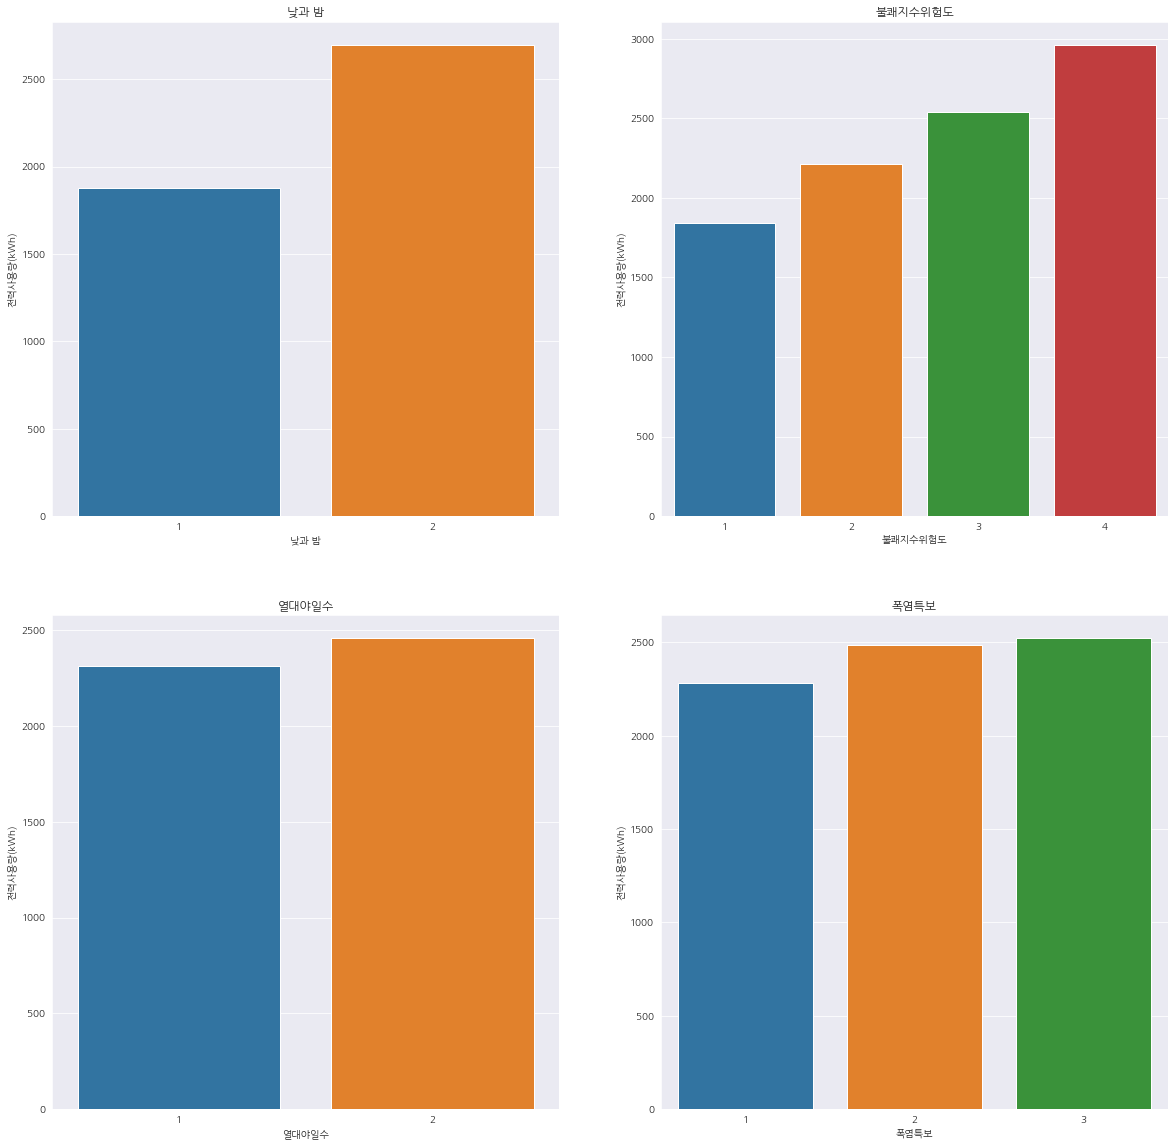

In [185]:
import seaborn as sns
khw1=df_train.groupby(['낮과 밤'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['불쾌지수위험도'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['열대야일수'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['폭염특보'])['전력사용량(kWh)'].mean().reset_index()


figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=khw1, x="낮과 밤", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.barplot(data=khw2, x="불쾌지수위험도", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.barplot(data=khw3, x="열대야일수", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.barplot(data=khw4, x="폭염특보", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="낮과 밤")
ax2.set(ylabel='전력사용량(kWh)', title ="불쾌지수위험도")
ax3.set(ylabel='전력사용량(kWh)', title ="열대야일수")
ax4.set(ylabel='전력사용량(kWh)', title ="폭염특보")

도표설명

- 첫 번째 도표: 1: 밤, 2: 낮

- 두 번째 도표: 숫자가 커질수록 불쾌지수 up

- 세 번째 도표: 1: 열대야 해당X, 2: 열대야 해당O

- 네 번째 도표: 1: 일반, 2: 폭염주의보: 3: 폭염특보

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '호우특보')]

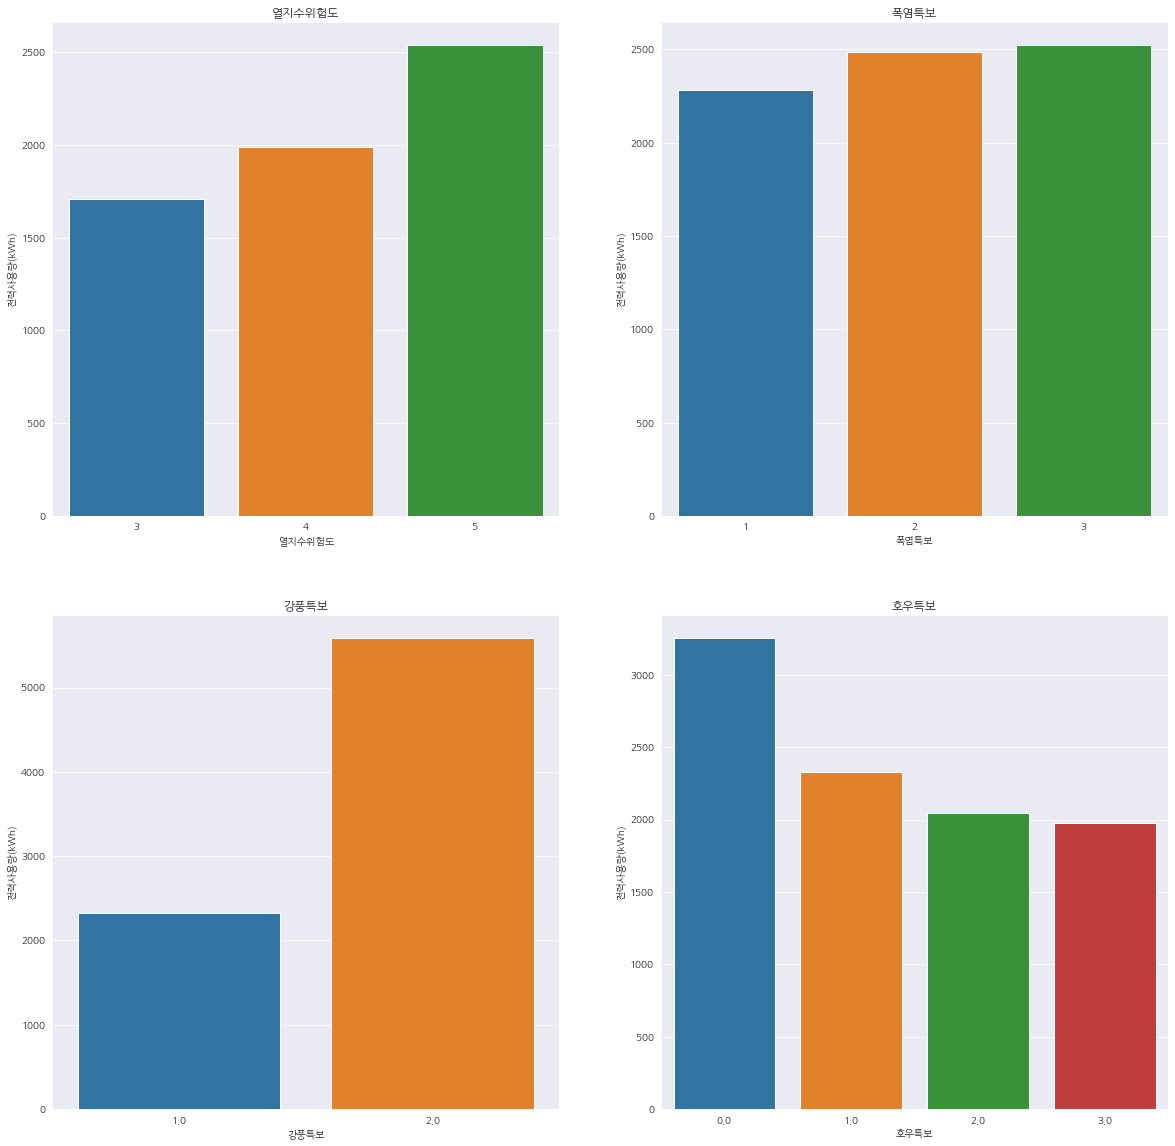

In [186]:
import seaborn as sns
khw1=df_train.groupby(['열지수위험도'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['폭염특보'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['강풍특보'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['호우특보'])['전력사용량(kWh)'].mean().reset_index()

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=khw1, x="열지수위험도", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.barplot(data=khw2, x="폭염특보", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.barplot(data=khw3, x="강풍특보", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.barplot(data=khw4, x="호우특보", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="열지수위험도")
ax2.set(ylabel='전력사용량(kWh)', title ="폭염특보")
ax3.set(ylabel='전력사용량(kWh)', title ="강풍특보")
ax4.set(ylabel='전력사용량(kWh)', title ="호우특보")

도표설명

- 첫 번째 도표: 열지수 위험도: 높을 수록 위험도 증가

- 두 번째 도표: 폭염특보: 0: 일반, 1: 폭염주의보, 2: 폭염경보

- 세 번째 도표: 강풍특보: 0: 일반, 1: 강풍주의보

- 네 번째 도표: 호우특보: 0: 일반, 1: 호우주의보

[Text(0, 0.5, '전력사용량(kWh)'), Text(0.5, 1.0, '체감온도')]

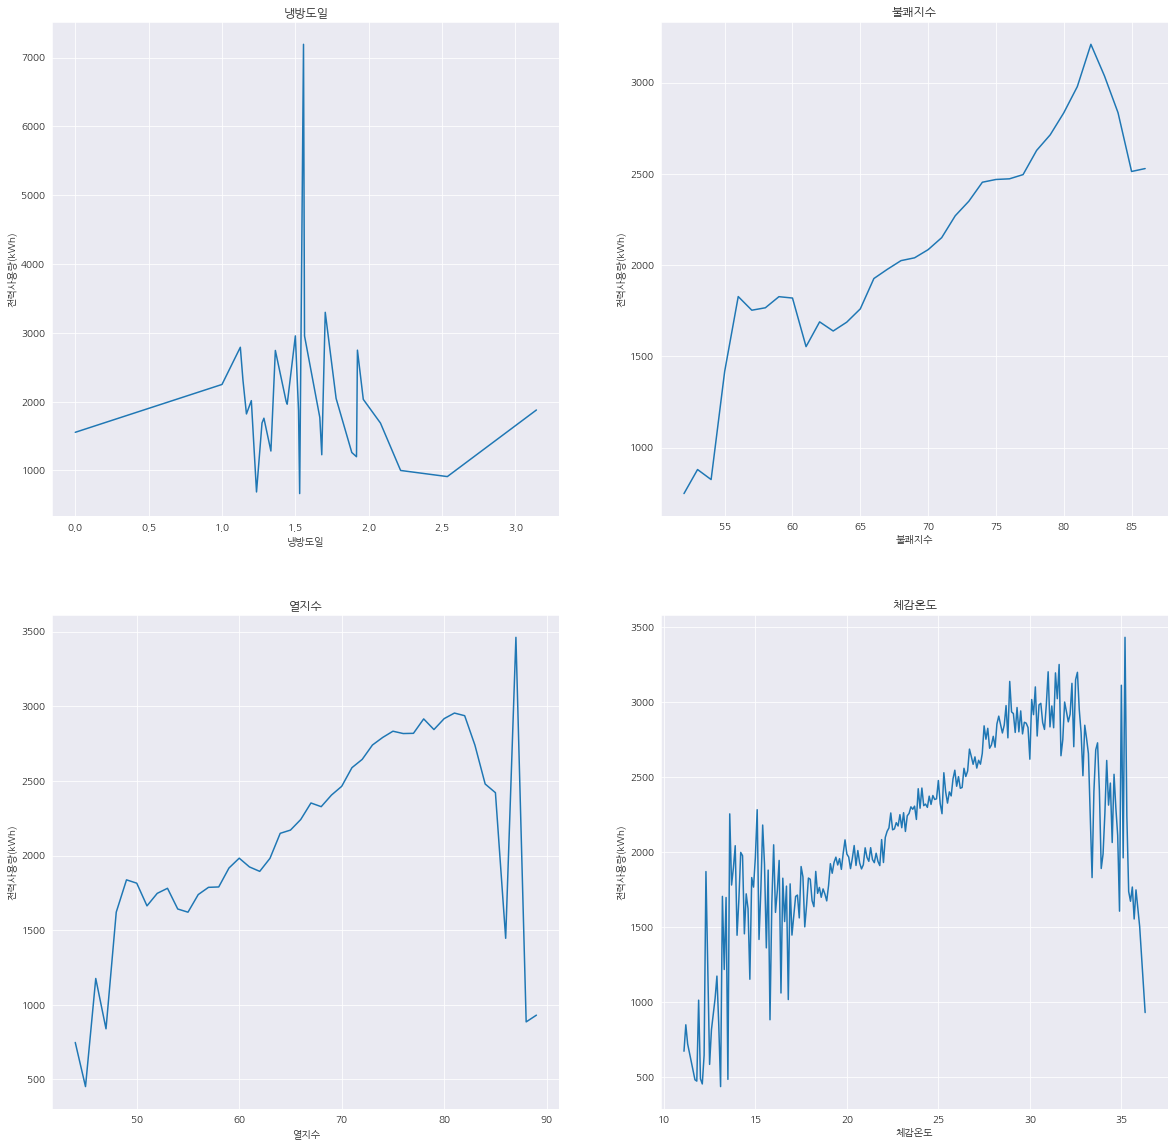

In [187]:
import seaborn as sns
khw1=df_train.groupby(['냉방도일'])['전력사용량(kWh)'].mean().reset_index()
khw2=df_train.groupby(['불쾌지수'])['전력사용량(kWh)'].mean().reset_index()
khw3=df_train.groupby(['열지수'])['전력사용량(kWh)'].mean().reset_index()
khw4=df_train.groupby(['체감온도'])['전력사용량(kWh)'].mean().reset_index()

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1,ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=khw1, x="냉방도일", y="전력사용량(kWh)", ax=ax1)
'\n'
sns.lineplot(data=khw2, x="불쾌지수", y="전력사용량(kWh)", ax=ax2)
'\n'
sns.lineplot(data=khw3, x="열지수", y="전력사용량(kWh)", ax=ax3)
'\n'
sns.lineplot(data=khw4, x="체감온도", y="전력사용량(kWh)", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='전력사용량(kWh)', title ="냉방도일")
ax2.set(ylabel='전력사용량(kWh)', title ="불쾌지수")
ax3.set(ylabel='전력사용량(kWh)', title ="열지수")
ax4.set(ylabel='전력사용량(kWh)', title ="체감온도")

도표설명

- 첫 번째 도표: 냉방도일

- 두 번째 도표: 불쾌지수: 오른쪽으로 갈수록 불쾌지수 증가

- 세 번째 도표: 열지수: 오른쪽으로 갈수록 열지수 증가

- 네 번째 도표: 체감온도: 오른쪽으로 갈수록 체감온도 증가

Linear Regression 적용해보기
--

In [188]:
df_train=df_train.fillna(0)

In [189]:
X_train=df_train.drop(['date_time', '전력사용량(kWh)'], axis=1)
y_train=df_train['전력사용량(kWh)']

#train_1=df_train.loc[df_train['time']<=81723]
#test_1=df_train.loc[df_train['time']>81723]
#train_2=train_1.drop(['date_time'], axis=1)
#test_2=test_1.drop(['date_time'],  axis=1)

#train=train_2.drop(['전력사용량(kWh)'], axis=1)
#test=test_2.drop(['전력사용량(kWh)'],  axis=1)
#y_train=train_2['전력사용량(kWh)']
#y_test=test_2['전력사용량(kWh)']

In [190]:
X_test=df_test

#X_train=train
#X_test=test

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [192]:
import numpy as np

y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 1959.7435673815319 입니다.
r2 는 0.09 입니다.
train 스코어는 0.0940804446240765 입니다.


In [193]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             전력사용량(kWh)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     552.6
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:            -1.1015e+06
No. Observations:              122400   AIC:                         2.203e+06
Df Residuals:                  122376   BIC:                         2.203e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2816.2751    723.395     -3.893      0.000   -4234.117   -1398.433
num           -9.5355      0.326    -29.233      0.000     -10.175      -8.896
기온(°C)        25.4625     14.439      1.763      0.078      -2.837      53.762
풍속(m/s)       89.7100      4.028     22.270      0.000      81.815      97.605
습도(%)          3.1632      1.549      2.042      0.041       0.126       6.200
강수량(mm)       -4.3176      2.719     -1.588      0.112      -9.647       1.012
일조(hr)       -30.1061     22.646     -1.329      0.184     -74.493      14.281
비전기냉방설비운영    647.3122     12.140     53.319      0.000     623.517     671.107
태양광보유        486.0262     11.426     42.536      0.000     463.631     508.421
time           0.0024      0.001      2.005      0.045    5.37e-05       0.005
month_day     -0.0730      0.009     -8.297      0.000      -0.090      -0.056
month         -0.0048      0.007     -0.678      0.498      -0.019       0.009
date           0.4036      0.703      0.574      0.566      -0.974       1.781
hour           7.3047      0.880      8.299      0.000       5.579       9.030
day           20.1529      2.845      7.083      0.000      14.576      25.729
강풍특보        1610.0467    357.075      4.509      0.000     910.186    2309.907
호우특보        -135.5355     95.749     -1.416      0.157    -323.202      52.131
체감온도          25.4625     14.439      1.763      0.078      -2.837      53.762
폭염특보          62.4113     10.924      5.713      0.000      41.000      83.823
열지수          -22.9728     15.654     -1.468      0.142     -53.655       7.709
열지수위험도        61.7694     20.668      2.989      0.003      21.261     102.278
불쾌지수          25.7776     10.812      2.384      0.017       4.587      46.968
불쾌지수위험도       16.8815     19.368      0.872      0.383     -21.079      54.842
냉방도일        -130.5019     16.731     -7.800      0.000    -163.294     -97.710
열대야일수       -209.4023     23.597     -8.874      0.000    -255.651    -163.153
낮과 밤         642.4344     14.040     45.759      0.000     614.917     669.952
시간별 비의 유무     -6.1159     19.482     -0.314      0.754     -44.301      32.069
==============================================================================
Omnibus:                    66293.610   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           512127.277
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      11.631   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.12e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

Text(0.5, 1.0, 'Feature Coeff')

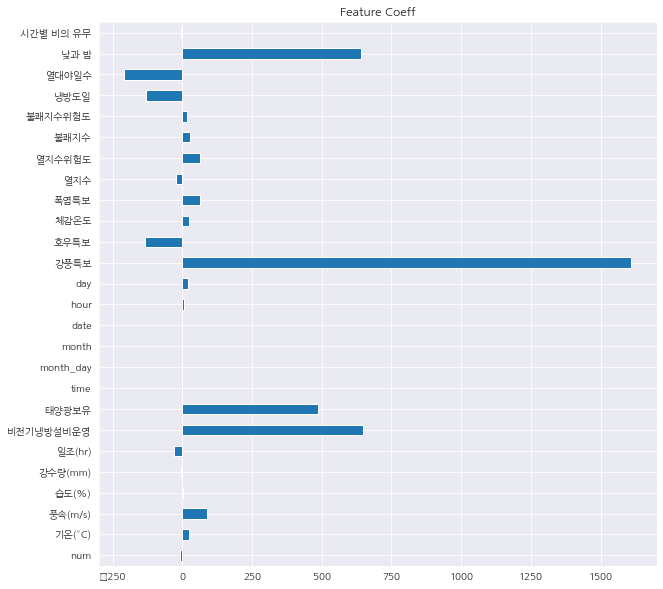

In [194]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

plt.rcParams['font.family'] = 'NanumGothic'
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()
plt.rcParams['font.family'] = 'NanumGothic'

ax.set_title("Feature Coeff")

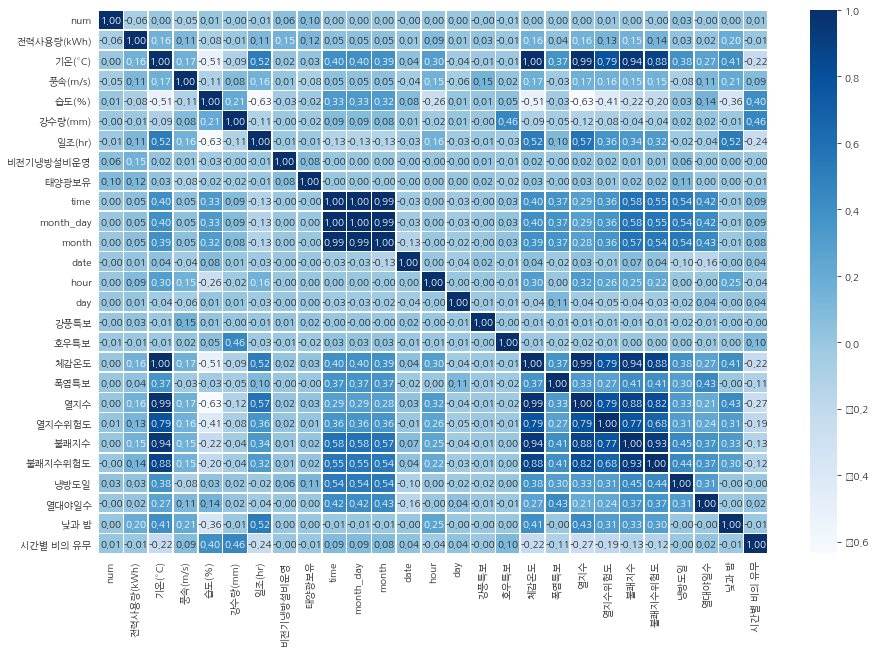

In [195]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

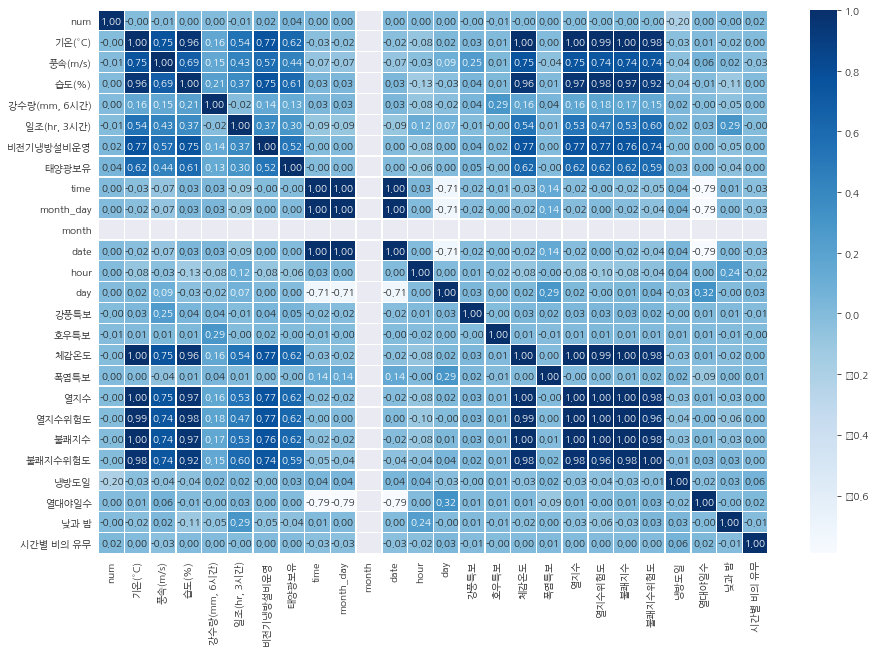

In [196]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=df_test.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Classification
--

In [197]:
cl_train=df_train.drop(['date_time','전력사용량(kWh)'], axis=1)

In [198]:
cl_test=df_test.drop(['date_time'], axis=1)

One-hot Encoding
--

In [199]:
c1_tn = pd.get_dummies(cl_train['비전기냉방설비운영'], prefix='비전기냉방설비운영')
c2_tn = pd.get_dummies(cl_train['태양광보유'], prefix='태양광보유')
c3_tn = pd.get_dummies(cl_train['강풍특보'], prefix='강풍특보')
c4_tn = pd.get_dummies(cl_train['호우특보'], prefix='호우특보')
c5_tn = pd.get_dummies(cl_train['폭염특보'], prefix='폭염특보')
c6_tn = pd.get_dummies(cl_train['열지수위험도'], prefix='열지수위험도')
c7_tn = pd.get_dummies(cl_train['불쾌지수위험도'], prefix='불쾌지수위험도')
c8_tn = pd.get_dummies(cl_train['열대야일수'], prefix='열대야일수')
c9_tn = pd.get_dummies(cl_train['낮과 밤'], prefix='낮과 밤')
c10_tn = pd.get_dummies(cl_train['시간별 비의 유무'], prefix='시간별 비의 유무')

c1_te = pd.get_dummies(cl_test['비전기냉방설비운영'], prefix='비전기냉방설비운영')
c2_te = pd.get_dummies(cl_test['태양광보유'], prefix='태양광보유')
c3_te = pd.get_dummies(cl_test['강풍특보'], prefix='강풍특보')
c4_te = pd.get_dummies(cl_test['호우특보'], prefix='호우특보')
c5_te = pd.get_dummies(cl_test['폭염특보'], prefix='폭염특보')
c6_te = pd.get_dummies(cl_test['열지수위험도'], prefix='열지수위험도')
c7_te = pd.get_dummies(cl_test['불쾌지수위험도'], prefix='불쾌지수위험도')
c8_te = pd.get_dummies(cl_test['열대야일수'], prefix='열대야일수')
c9_te = pd.get_dummies(cl_test['낮과 밤'], prefix='낮과 밤')
c10_te = pd.get_dummies(cl_test['시간별 비의 유무'], prefix='시간별 비의 유무')

In [200]:
c_train=pd.concat([c1_tn, c2_tn, c3_tn, c4_tn, c5_tn, c6_tn, c7_tn, c8_tn, c9_tn, c10_tn], axis=1)

In [201]:
c_test=pd.concat([c1_te, c2_te, c3_te, c4_te, c5_te, c6_te, c7_te, c8_te, c9_te, c10_te], axis=1)

In [202]:
cl_train=pd.concat([cl_train, c_train], axis=1)

In [203]:
cl_test=pd.concat([cl_test, c_test], axis=1)

In [204]:
cl_train.drop(['비전기냉방설비운영','태양광보유','강풍특보','호우특보','폭염특보','열지수위험도','불쾌지수위험도','열대야일수','낮과 밤','시간별 비의 유무'], axis=1, inplace=True)

In [205]:
cl_test.drop(['비전기냉방설비운영','태양광보유','강풍특보','호우특보','폭염특보','열지수위험도','불쾌지수위험도','열대야일수','낮과 밤','시간별 비의 유무'], axis=1, inplace=True)

In [206]:
cl_train

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time,month_day,month,date,...,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,17.6,2.5,92.0,0.8,0.0,60100,601,6,1,...,1,0,0,0,1,0,1,0,0,1
1,1,17.7,2.9,91.0,0.3,0.0,60101,601,6,1,...,1,0,0,0,1,0,1,0,0,1
2,1,17.5,3.2,91.0,0.0,0.0,60102,601,6,1,...,1,0,0,0,1,0,1,0,1,0
3,1,17.1,3.2,91.0,0.0,0.0,60103,601,6,1,...,1,0,0,0,1,0,1,0,1,0
4,1,17.0,3.3,92.0,0.0,0.0,60104,601,6,1,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,82419,824,8,24,...,0,0,1,0,1,0,0,1,1,0
122396,60,27.3,1.2,71.0,0.0,0.0,82420,824,8,24,...,0,0,1,0,1,0,1,0,1,0
122397,60,27.3,1.8,71.0,0.0,0.0,82421,824,8,24,...,0,0,1,0,1,0,1,0,1,0
122398,60,27.1,1.8,74.0,0.0,0.0,82422,824,8,24,...,0,0,1,0,1,0,1,0,1,0


In [207]:
cl_test

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",time,month_day,month,date,...,불쾌지수위험도_1,불쾌지수위험도_2,불쾌지수위험도_3,불쾌지수위험도_4,열대야일수_1,열대야일수_2,낮과 밤_1,낮과 밤_2,시간별 비의 유무_1,시간별 비의 유무_2
0,1,27.8,1.5,74.0,0.0,0.0,82500,825,8,25,...,0,0,1,0,0,1,1,0,0,1
1,1,0.0,0.0,0.0,0.0,0.0,82501,825,8,25,...,1,0,0,0,0,1,1,0,0,1
2,1,0.0,0.0,0.0,0.0,0.0,82502,825,8,25,...,1,0,0,0,0,1,1,0,1,0
3,1,27.3,1.1,78.0,0.0,0.0,82503,825,8,25,...,0,0,1,0,0,1,1,0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,82504,825,8,25,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,0.0,0.0,0.0,0.0,0.0,83119,831,8,31,...,1,0,0,0,1,0,0,1,1,0
10076,60,0.0,0.0,0.0,0.0,0.0,83120,831,8,31,...,1,0,0,0,1,0,1,0,1,0
10077,60,27.9,4.1,68.0,0.0,0.0,83121,831,8,31,...,0,0,1,0,1,0,1,0,1,0
10078,60,0.0,0.0,0.0,0.0,0.0,83122,831,8,31,...,1,0,0,0,1,0,1,0,1,0


In [208]:
# cl_train에는 있지만 cl_test에는 없는 칼럼

cl_test['호우특보_3.0']=0
cl_test['폭염특보_3']=0
cl_test['열지수위험도_3']=0
cl_test['열지수위험도_2']=0
cl_test['호우특보_0.0']=0

In [209]:
# cl_test에는 있지만 cl_train에는 없는 칼럼
cl_train['강풍특보_3.0']=0
cl_train['열지수위험도_1']=0
cl_train['열지수위험도_2']=0

In [210]:
cl_test[ '강수량(mm)']=cl_test['강수량(mm, 6시간)']
cl_test['일조(hr)']=cl_test['일조(hr, 3시간)']

cl_test.drop(['강수량(mm, 6시간)'], axis=1, inplace=True)
cl_test.drop(['일조(hr, 3시간)'], axis=1, inplace=True)

Train칼럼과 Test칼럼 맞춰주기
--

In [211]:
cl_train=cl_train[['num','time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
       '강풍특보_1.0', '강풍특보_2.0','강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0',
       '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1',  '열지수위험도_2','열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2']]

In [212]:
cl_test=cl_test[['num','time', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)',
       'month_day', 'month', 'date', 'hour', 'day', '체감온도', '열지수', '불쾌지수',
       '냉방도일', '비전기냉방설비운영_0.0', '비전기냉방설비운영_1.0', '태양광보유_0.0', '태양광보유_1.0',
       '강풍특보_1.0', '강풍특보_2.0','강풍특보_3.0', '호우특보_0.0', '호우특보_1.0', '호우특보_2.0', '호우특보_3.0',
       '폭염특보_1', '폭염특보_2', '폭염특보_3', '열지수위험도_1',  '열지수위험도_2','열지수위험도_3', '열지수위험도_4', '열지수위험도_5',
       '불쾌지수위험도_1', '불쾌지수위험도_2', '불쾌지수위험도_3', '불쾌지수위험도_4', '열대야일수_1',
       '열대야일수_2', '낮과 밤_1', '낮과 밤_2', '시간별 비의 유무_1', '시간별 비의 유무_2']]

XGBoost
--

In [213]:
X_train=cl_train
X_test=cl_test

In [214]:
from xgboost import XGBClassifier
import xgboost as xgb
import tqdm
import timeit
from tqdm import tqdm
from tqdm import notebook
from tqdm import tqdm_notebook
from time import sleep

xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(X_train, y_train))
%time
XGBscore_train = xgb_reg.score(X_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

Wall time: 0 ns
XGboosting train 점수는 0.984


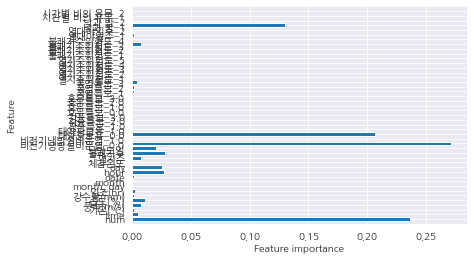

In [215]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(xgb_reg)

In [216]:
pred=xgb_reg.predict(X_test)

In [217]:
#df_sample_submission.drop(['num','time'], axis=1, inplace=True)

In [218]:
submission = df_sample_submission['num_date_time']
submission = {"num_date_time":df_sample_submission.num_date_time, "answer":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float32
dtypes: float32(1), object(1)
memory usage: 118.2+ KB


In [219]:
submission

,num_date_time,answer
0,1 2020-08-25 00,8599.548828
1,1 2020-08-25 01,8577.838867
2,1 2020-08-25 02,8488.507812
3,1 2020-08-25 03,8409.555664
4,1 2020-08-25 04,8455.752930
...,...,...
10075,60 2020-08-31 19,1341.716187
10076,60 2020-08-31 20,1567.038452
10077,60 2020-08-31 21,3591.906982
10078,60 2020-08-31 22,1423.959595


In [220]:
#submission.to_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/submission(ver6).csv', index=False)

Lightgbm
--

In [221]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

lgbm_reg.fit(X_train, y_train)
%time
LGBMscore_train = lgbm_reg.score(X_train, y_train) # train set 정확도

print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))

Wall time: 0 ns
lightgbm train 점수는 0.974


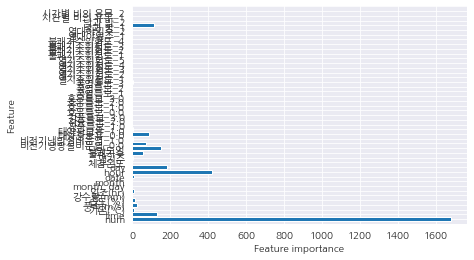

In [222]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(lgbm_reg)

In [223]:
pred=lgbm_reg.predict(X_test)

In [224]:
submission = df_sample_submission['num_date_time']
submission = {"num_date_time":df_sample_submission.num_date_time, "answer":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


In [225]:
submission

,num_date_time,answer
0,1 2020-08-25 00,8540.889168
1,1 2020-08-25 01,8519.435950
2,1 2020-08-25 02,8483.858635
3,1 2020-08-25 03,8488.532307
4,1 2020-08-25 04,8477.576355
...,...,...
10075,60 2020-08-31 19,1859.149493
10076,60 2020-08-31 20,1906.811112
10077,60 2020-08-31 21,3413.931684
10078,60 2020-08-31 22,1857.425481


Cat boosting
--

In [226]:
from catboost import CatBoostClassifier
import catboost as cb

cb_reg= cb.CatBoostRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

cb_reg.fit(X_train, y_train)
%time
CBscore_train = cb_reg.score(X_train, y_train) # train set 정확도

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

Learning rate set to 0.091839
0:	learn: 1974.6288782	total: 201ms	remaining: 3m 20s
1:	learn: 1909.8526235	total: 244ms	remaining: 2m 2s
2:	learn: 1852.8423313	total: 275ms	remaining: 1m 31s
3:	learn: 1792.1117996	total: 289ms	remaining: 1m 11s
4:	learn: 1738.6878317	total: 305ms	remaining: 1m
5:	learn: 1686.4031069	total: 320ms	remaining: 53s
6:	learn: 1650.1505822	total: 351ms	remaining: 49.8s
7:	learn: 1618.7564309	total: 366ms	remaining: 45.4s
8:	learn: 1579.9586536	total: 380ms	remaining: 41.9s
9:	learn: 1558.0915485	total: 397ms	remaining: 39.3s
10:	learn: 1523.2670412	total: 443ms	remaining: 39.8s
11:	learn: 1495.8705746	total: 457ms	remaining: 37.7s
12:	learn: 1467.2255601	total: 471ms	remaining: 35.8s
13:	learn: 1444.4459250	total: 487ms	remaining: 34.3s
14:	learn: 1431.2912122	total: 503ms	remaining: 33s
15:	learn: 1408.8705960	total: 548ms	remaining: 33.7s
16:	learn: 1388.1693726	total: 619ms	remaining: 35.8s
17:	learn: 1362.6755016	total: 648ms	remaining: 35.3s
18:	learn: 1

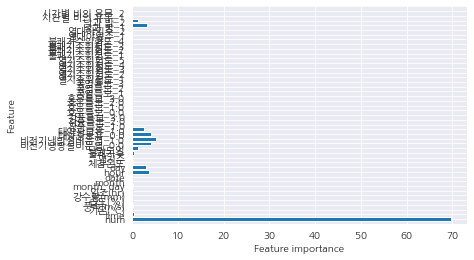

In [227]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(cb_reg)

In [228]:
pred=cb_reg.predict(X_test)

In [229]:
submission = df_sample_submission['num_date_time']
submission = {"num_date_time":df_sample_submission.num_date_time, "answer":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


In [230]:
submission

,num_date_time,answer
0,1 2020-08-25 00,8472.394535
1,1 2020-08-25 01,8323.182199
2,1 2020-08-25 02,8288.661571
3,1 2020-08-25 03,8396.242223
4,1 2020-08-25 04,8233.001947
...,...,...
10075,60 2020-08-31 19,1072.512331
10076,60 2020-08-31 20,1188.027739
10077,60 2020-08-31 21,3563.296717
10078,60 2020-08-31 22,1083.637279
